# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them and find the best one that will help identify failures so that the generator could be repaired before failing/breaking and the overall maintenance cost of the generators can be brought down. 

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a wind turbine where there is no detection by model. 
- False positives (FP) are detections in a wind turbine where there is no failure. 

So, the maintenance cost associated with the model would be:

**Maintenance cost** = `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`
where,

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

Here the objective is to reduce the maintenance cost so, we want a metric that could reduce the maintenance cost.

- The minimum possible maintenance cost  =  `Actual failures*(Repair cost) = (TP + FN)*(Repair cost)`
- The maintenance cost associated with model = `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`

So, we will try to maximize the ratio of minimum possible maintenance cost and the maintenance cost associated with the model.

The value of this ratio will lie between 0 and 1, the ratio will be 1 only when the maintenance cost associated with the model will be equal to the minimum possible maintenance cost.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing libraries

In [581]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores and split data
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)

# To impute missing values
from sklearn.impute import KNNImputer

# To build a logistic regression model
from sklearn.linear_model import LogisticRegression

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To suppress the warnings
import warnings

warnings.filterwarnings("ignore")

# This will help in making the Python code more structured automatically (good coding practice)
%reload_ext nb_black

# To use metrics and make_scorer in  the metric Minimum_Vs_Model_cost
from sklearn.metrics import make_scorer
from sklearn import metrics

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To be used for missing value imputation
from sklearn.impute import SimpleImputer


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Loading Data

In [582]:
renew_train = pd.read_csv("Train.csv")
renew_test = pd.read_csv("Test.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [583]:
# Checking the number of rows and columns in the train dataset
renew_train.shape

(40000, 41)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [584]:
# Checking the number of rows and columns in the test dataset
renew_test.shape

(10000, 41)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The train dataset has 40000 rows and 41 columns
* The test dataset has 10000 rows and 41 columns

In [585]:
# Combine the train and test datasets for EDA
frames = [renew_train, renew_test]
renew_combined = pd.concat(frames)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [586]:
renew_combined.shape

(50000, 41)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

###  Data Overview 

In [587]:
# let's create a copy of the data
data = renew_combined.copy()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [588]:
# let's view the first 5 rows of the data
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1 -2.909996 -2.568662  4.109032  1.316672 -1.620594 -3.827212 -1.616970   
2  4.283674  5.105381  6.092238  2.639922 -1.041357  1.308419 -1.876140   
3  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
4 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   

         V8        V9       V10  ...       V32       V33       V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440  2.846296  2.235198   
1  0.669006  0.387045  0.853814  ... -3.782686 -6.823172  4.908562  0.481554   
2 -9.582412  3.469504  0.763395  ... -3.097934  2.690334 -1.643048  7.566482   
3 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780 -2.467514  1.894599   
4 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550  4.086219  2.292138   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1  5.338051  2.381297 -3.127756  3.527309 -3.019581       0  
2 -3.197647 -3.495672  8.104779  0.562085 -4.227426       0  
3 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
4  5.360850  0.351993  2.940021  3.839160 -4.309402       0  

[5 rows x 41 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [589]:
# let's view the last 5 rows of the data
data.tail()

V1        V2        V3        V4        V5        V6        V7  \
9995 -2.846746 -0.808828  0.475822 -3.742892  3.009556  1.825422 -3.675837   
9996 -1.439081  3.414045 -2.786811  9.378783 -2.252089 -2.817603  1.124661   
9997 -1.703241  0.614650  6.220503 -0.104132  0.955916 -3.278706 -1.633855   
9998 -2.037301 -4.068539  0.525798  0.598100 -2.517844 -4.180772  1.110016   
9999 -0.603701  0.959550 -0.720995  8.229574 -1.815610 -2.275547 -2.574524   

            V8        V9       V10  ...       V32       V33       V34  \
9995 -2.057177 -0.021756 -0.848866  ...  6.148098  6.500759 -7.757896   
9996 -1.287717  5.115467 -3.412366  ... -6.005167 -7.740605  7.213442   
9997 -0.103936  1.388152 -1.065622  ... -4.100352 -5.949325  0.550372   
9998  5.443957 -3.856603  2.524608  ... -0.520402 -6.952070  7.476771   
9999 -1.041479  4.129645 -2.731288  ...  2.369776 -1.062408  0.790772   

           V35       V36       V37       V38       V39       V40  Target  
9995  1.956287  3.601460  0.691951 -1.310080  0.907578  1.816915       0  
9996 -2.636287 -8.584351  1.553226  2.756595 -0.101038 -6.162453       1  
9997 -1.573640  6.823936  2.139307 -4.036164  3.436051  0.579249       0  
9998  1.178398  3.912227  1.972555 -2.149725  1.569903 -2.306153       0  
9999  4.951955 -7.440825 -0.069506 -0.918083 -2.291154 -5.362891       0  

[5 rows x 41 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [590]:
# let's check the data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 9999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      49943 non-null  float64
 1   V2      49954 non-null  float64
 2   V3      50000 non-null  float64
 3   V4      50000 non-null  float64
 4   V5      50000 non-null  float64
 5   V6      50000 non-null  float64
 6   V7      50000 non-null  float64
 7   V8      50000 non-null  float64
 8   V9      50000 non-null  float64
 9   V10     50000 non-null  float64
 10  V11     50000 non-null  float64
 11  V12     50000 non-null  float64
 12  V13     50000 non-null  float64
 13  V14     50000 non-null  float64
 14  V15     50000 non-null  float64
 15  V16     50000 non-null  float64
 16  V17     50000 non-null  float64
 17  V18     50000 non-null  float64
 18  V19     50000 non-null  float64
 19  V20     50000 non-null  float64
 20  V21     50000 non-null  float64
 21  V22     50000 non-null  float64
 22 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Observations 
* All the columns are float datatype. The target variable is an integer

In [591]:
# let's check for duplicate values in the data
data.duplicated().sum()

0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Observations
* There are no duplicate values in the train dataset

In [592]:
# let's check for missing values in the data
round(data.isnull().sum() / data.isnull().count() * 100, 2)

V1        0.11
V2        0.09
V3        0.00
V4        0.00
V5        0.00
V6        0.00
V7        0.00
V8        0.00
V9        0.00
V10       0.00
V11       0.00
V12       0.00
V13       0.00
V14       0.00
V15       0.00
V16       0.00
V17       0.00
V18       0.00
V19       0.00
V20       0.00
V21       0.00
V22       0.00
V23       0.00
V24       0.00
V25       0.00
V26       0.00
V27       0.00
V28       0.00
V29       0.00
V30       0.00
V31       0.00
V32       0.00
V33       0.00
V34       0.00
V35       0.00
V36       0.00
V37       0.00
V38       0.00
V39       0.00
V40       0.00
Target    0.00
dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Observations
* Column V1 has 0.11% values missing
* Column V2 has 0.09% values missing

In [593]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

count      mean       std        min       25%       50%       75%  \
V1      49943.0 -0.282464  3.447271 -13.501880 -2.743078 -0.763193  1.841801   
V2      49954.0  0.437483  3.143469 -13.212051 -1.647111  0.462847  2.535182   
V3      50000.0  2.515492  3.404023 -12.940616  0.209396  2.268042  4.600534   
V4      50000.0 -0.063615  3.442310 -16.015417 -2.354226 -0.131692  2.147664   
V5      50000.0 -0.052622  2.106177  -8.612973 -1.524851 -0.106190  1.341980   
V6      50000.0 -1.003470  2.037258 -10.227147 -2.367461 -1.007965  0.369929   
V7      50000.0 -0.895904  1.752564  -8.205806 -2.036467 -0.935790  0.202484   
V8      50000.0 -0.570273  3.307717 -15.657561 -2.662428 -0.384405  1.710841   
V9      50000.0 -0.001041  2.165552  -8.596313 -1.492890 -0.059086  1.434368   
V10     50000.0  0.002395  2.180208 -11.000790 -1.385728  0.113946  1.495507   
V11     50000.0 -1.923108  3.114148 -15.384183 -3.947120 -1.946113  0.086039   
V12     50000.0  1.572600  2.912838 -13.619304 -0.440541  1.478565  3.535923   
V13     50000.0  1.596705  2.864838 -13.831903 -0.193629  1.669809  3.475298   
V14     50000.0 -0.945480  1.793375  -8.309443 -2.163680 -0.955735  0.264932   
V15     50000.0 -2.438899  3.337696 -17.201998 -4.447319 -2.401744 -0.397467   
V16     50000.0 -2.957676  4.224731 -21.918711 -5.641959 -2.732180 -0.115322   
V17     50000.0 -0.145129  3.348054 -17.633947 -2.239475 -0.024522  2.066579   
V18     50000.0  1.187108  2.582070 -12.214016 -0.402790  0.868388  2.562075   
V19     50000.0  1.188688  3.399091 -14.169635 -1.052110  1.285345  3.512293   
V20     50000.0  0.037343  3.680876 -13.922659 -2.431371  0.037406  2.516258   
V21     50000.0 -3.632203  3.561466 -19.436404 -5.943179 -3.577670 -1.287824   
V22     50000.0  0.944643  1.640839 -10.122095 -0.106597  0.965023  2.015634   
V23     50000.0 -0.400133  4.054329 -16.187510 -3.127839 -0.271121  2.428500   
V24     50000.0  1.132375  3.913322 -18.487811 -1.503746  0.952362  3.556193   
V25     50000.0  0.004513  2.023915  -8.228266 -1.367289  0.028290  1.403508   
V26     50000.0  1.892158  3.421522 -12.587902 -0.306675  1.965322  4.165105   
V27     50000.0 -0.605063  4.394175 -14.904939 -3.678693 -0.900538  2.215126   
V28     50000.0 -0.887399  1.925515  -9.685082 -2.188972 -0.910628  0.380025   
V29     50000.0 -1.012274  2.673050 -12.579469 -2.801679 -1.218713  0.595303   
V30     50000.0 -0.039610  3.032573 -14.796047 -1.919318  0.175408  2.031358   
V31     50000.0  0.501403  3.476380 -19.376732 -1.793735  0.496174  2.776333   
V32     50000.0  0.312029  5.500217 -23.200866 -3.403515  0.044506  3.784771   
V33     50000.0  0.046879  3.569798 -17.454014 -2.245345 -0.058136  2.241522   
V34     50000.0 -0.455852  3.182112 -17.985094 -2.118038 -0.240990  1.442804   
V35     50000.0  2.239536  2.923146 -19.522334  0.338313  2.117117  4.051883   
V36     50000.0  1.534024  3.814629 -17.478949 -0.928539  1.580589  4.009270   
V37     50000.0 -0.001614  1.779059  -7.639952 -1.267810 -0.136808  1.165882   
V38     50000.0 -0.355488  3.970872 -17.375002 -3.014300 -0.329640  2.298586   
V39     50000.0  0.904015  1.746060  -7.147175 -0.255200  0.923673  2.076958   
V40     50000.0 -0.905036  3.000452 -11.930259 -2.960029 -0.957148  1.090963   
Target  50000.0  0.054680  0.227357   0.000000  0.000000  0.000000  0.000000   

              max  
V1      17.436981  
V2      14.079073  
V3      18.366477  
V4      13.279712  
V5       9.403469  
V6       7.065470  
V7       8.006091  
V8      11.679495  
V9       8.850720  
V10      8.108472  
V11     13.851834  
V12     15.753586  
V13     15.419616  
V14      6.213289  
V15     12.874679  
V16     13.975843  
V17     19.776592  
V18     13.642235  
V19     16.059004  
V20     16.052339  
V21     16.218317  
V22      7.505291  
V23     15.080172  
V24     19.769376  
V25      8.223389  
V26     17.528193  
V27     21.594552  
V28      7.415659  
V29     14.039466  
V30     13.190889  
V31     17.255090  
V32     2

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* 57 missing observations in V1 and 46 missing observations in V2
* The variables V3 through V40 are having minimum values ranging from negative values to maximum positive valies

## EDA and insights

### Univariate Analysis

In [594]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [595]:
# build the list of column names
cols = []
for n in range(1, 41):
    colnames = "V" + str(n)
    cols.append(colnames)
print(cols)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

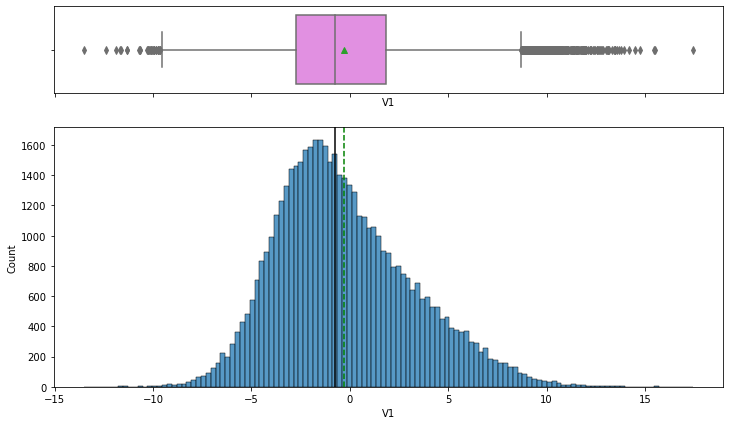

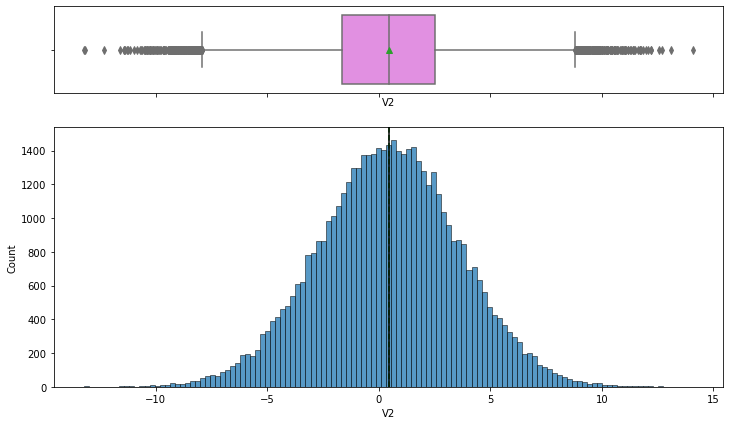

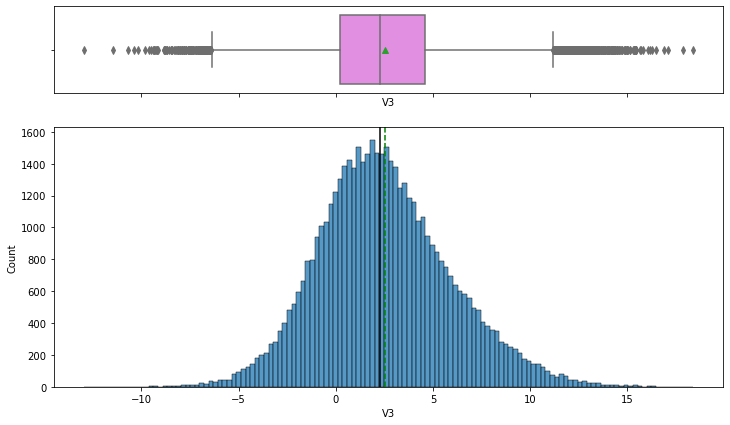

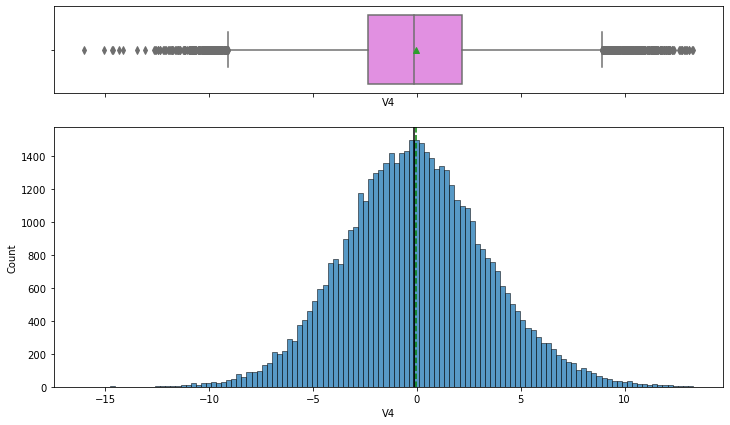

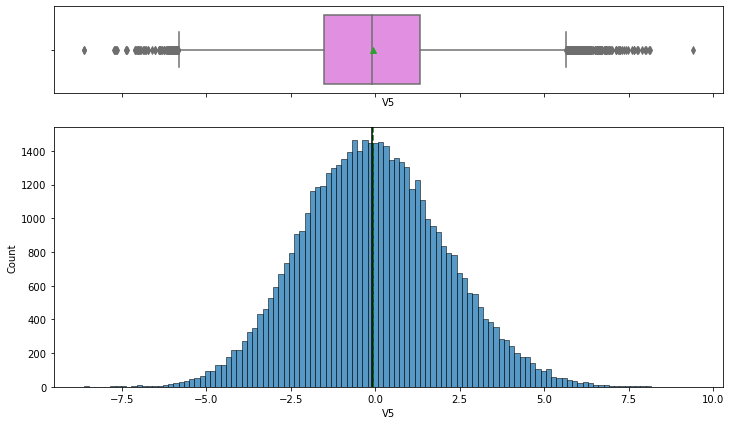

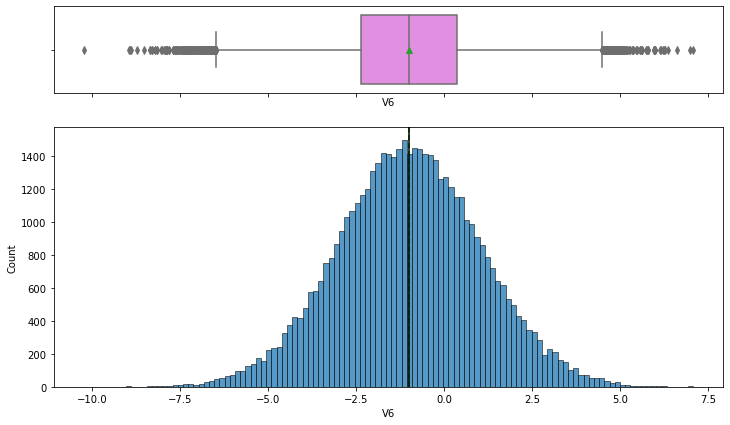

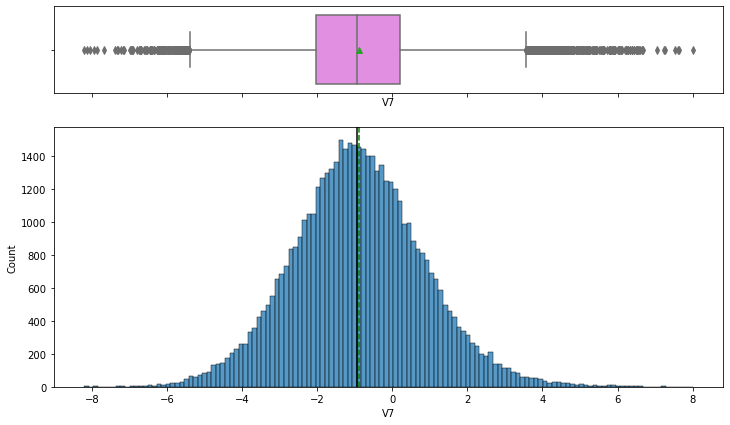

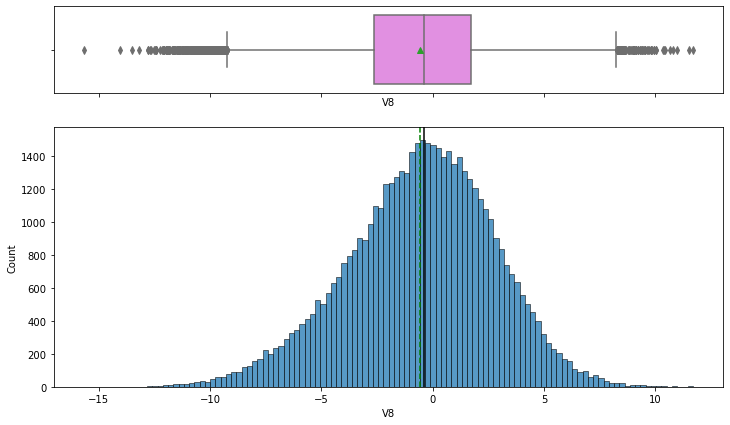

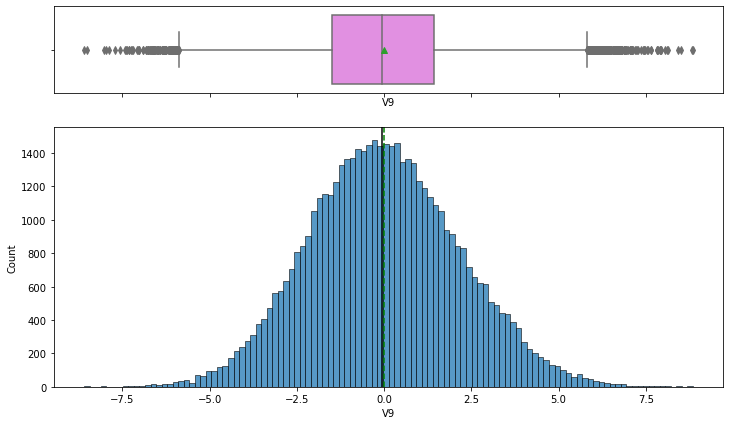

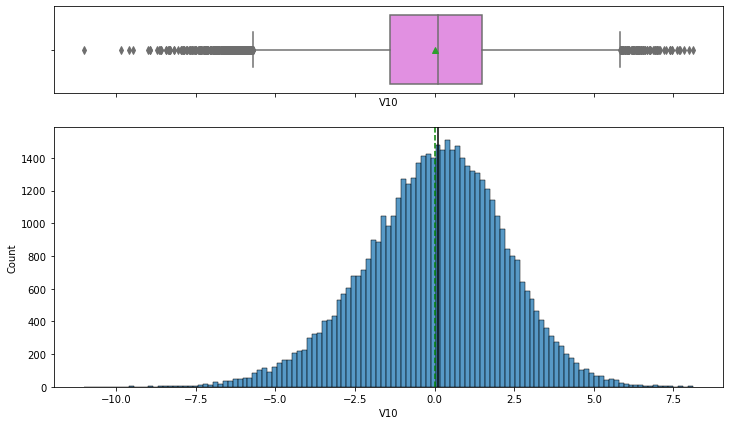

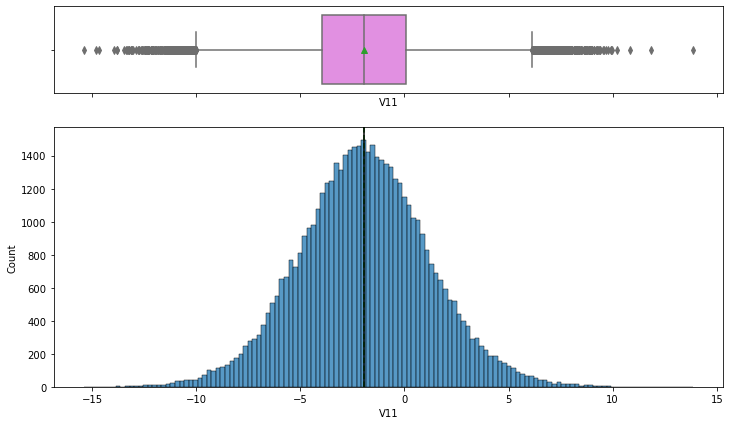

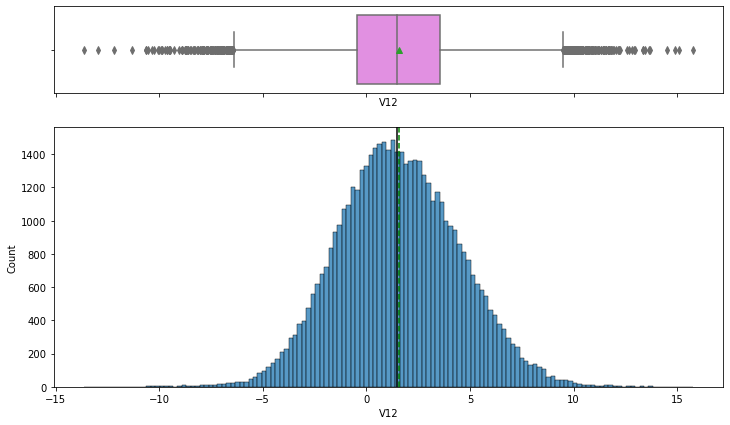

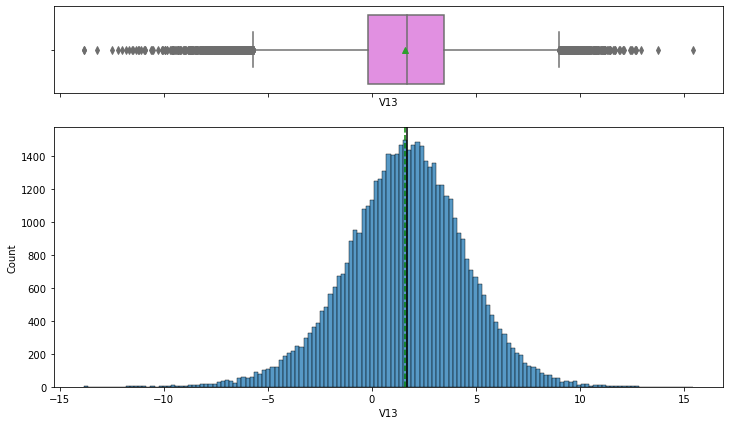

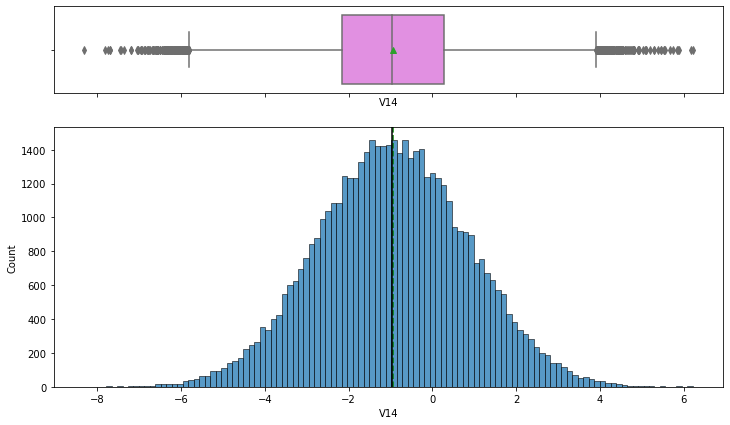

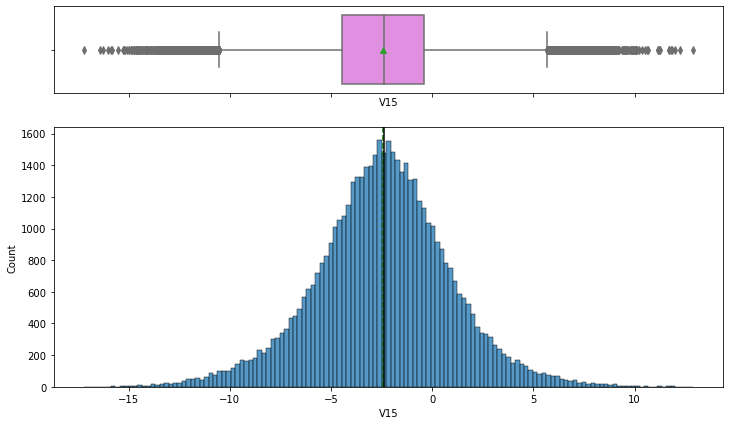

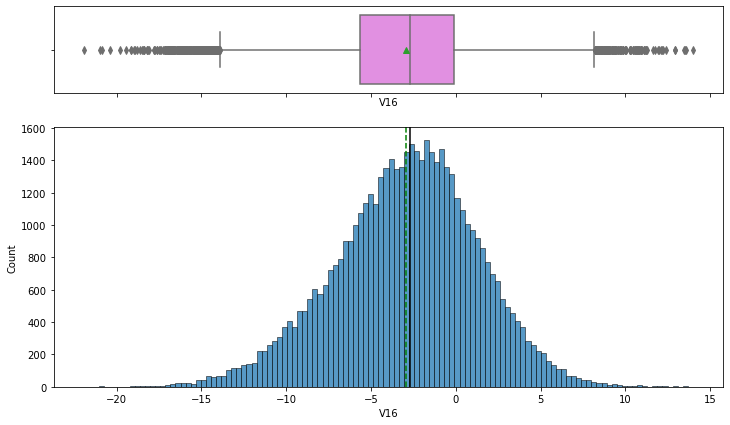

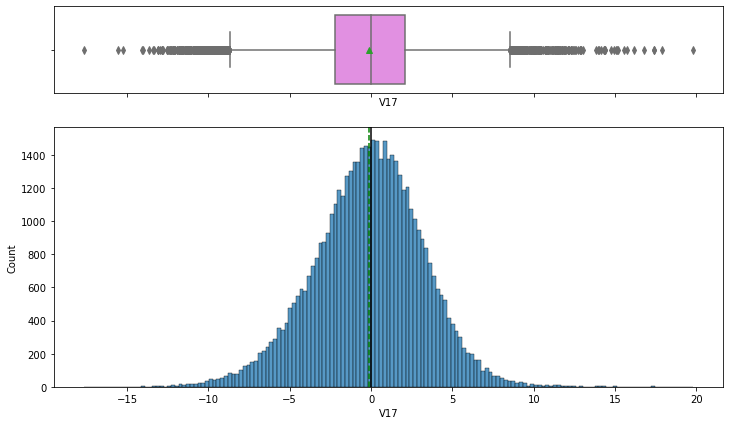

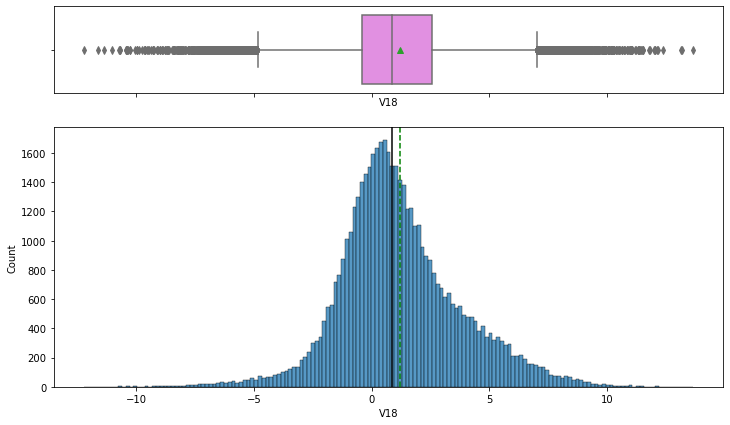

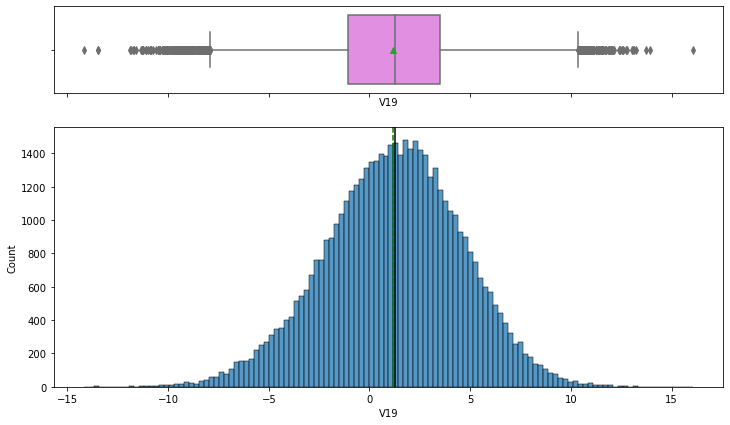

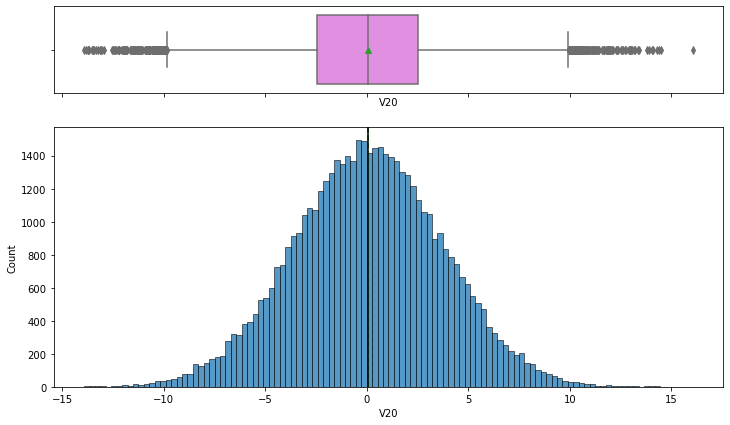

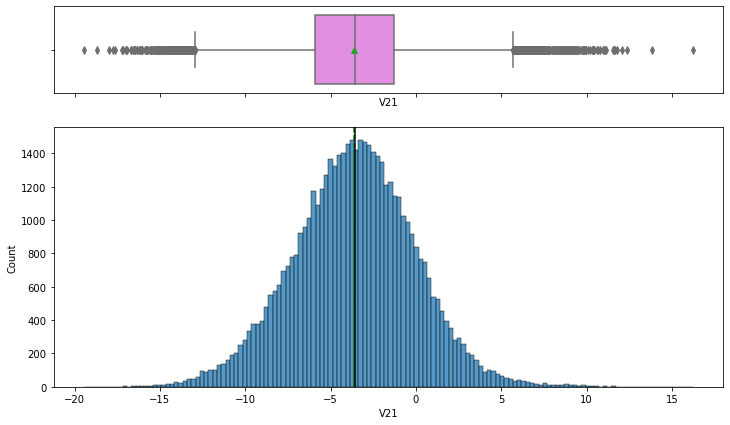

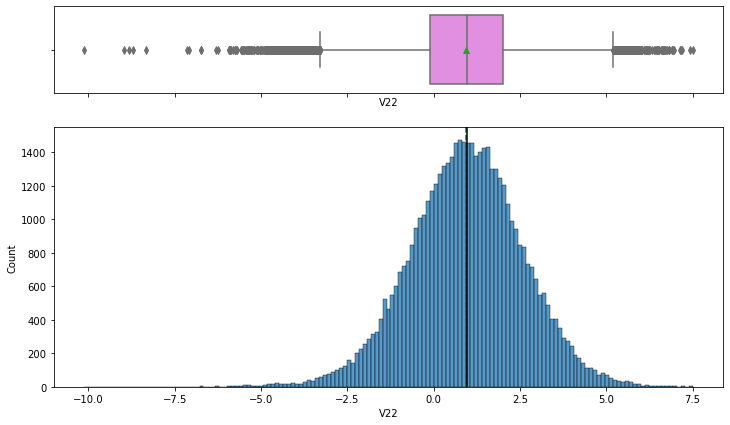

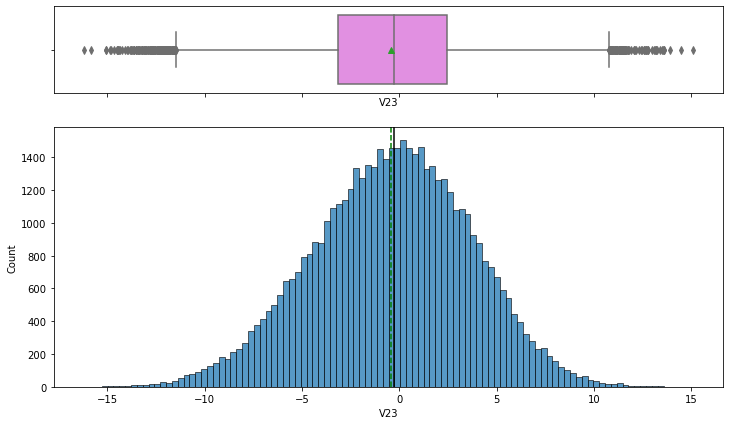

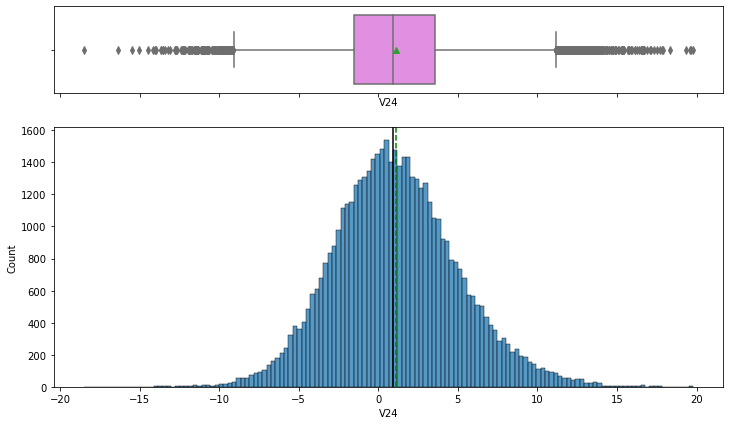

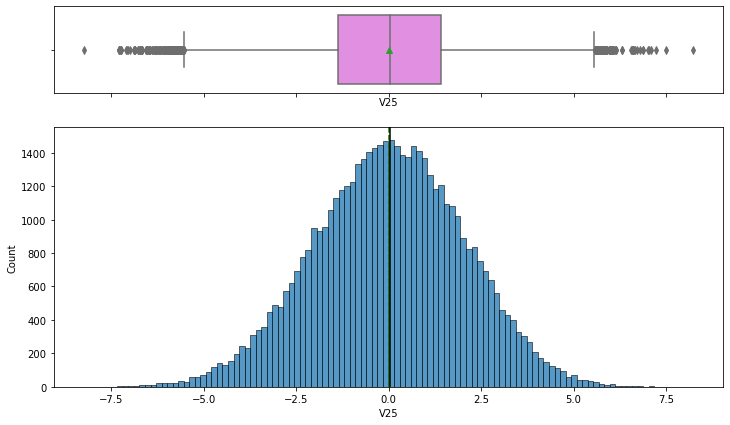

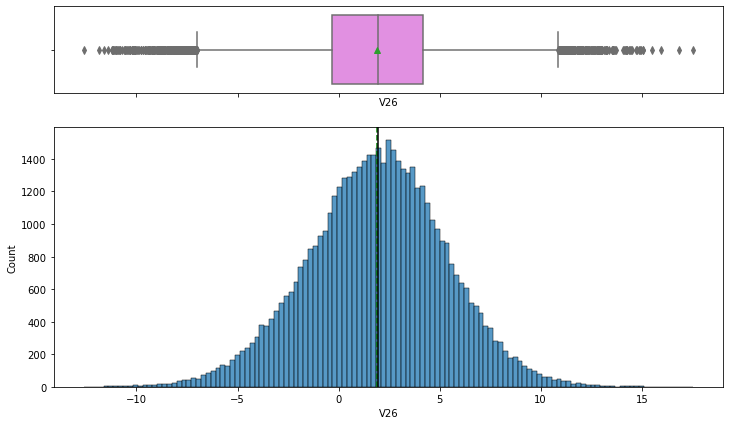

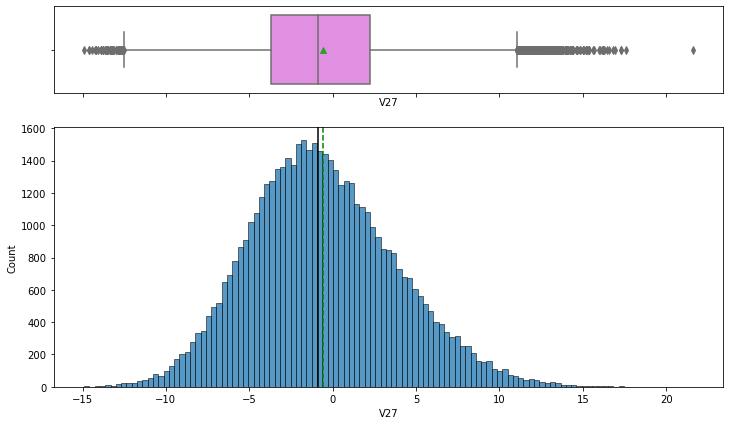

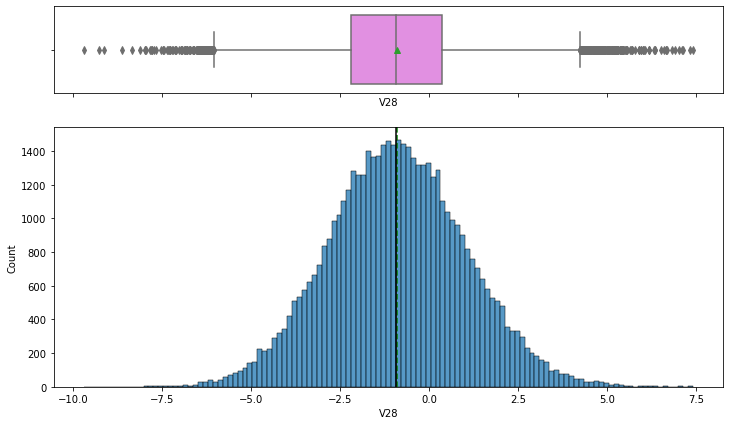

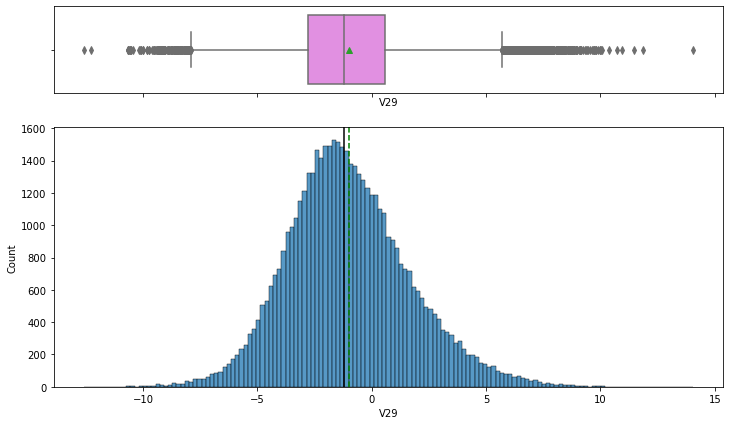

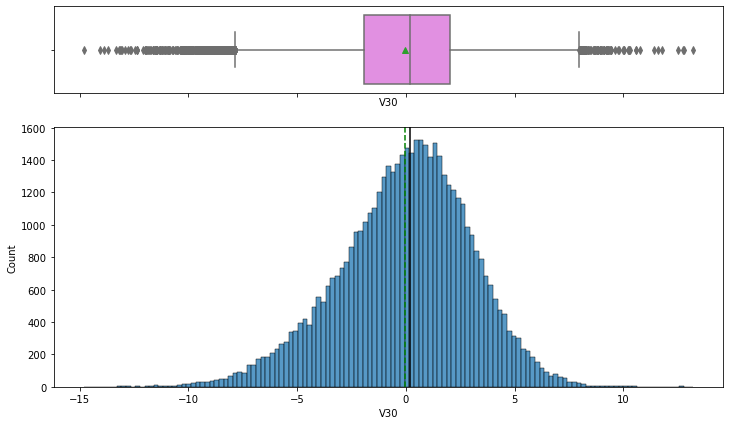

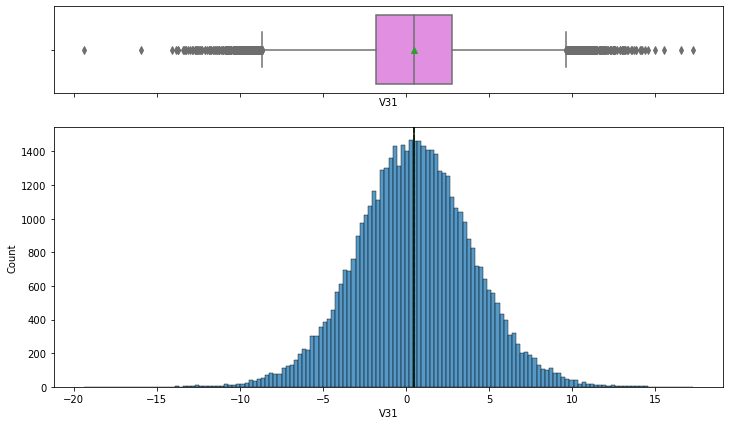

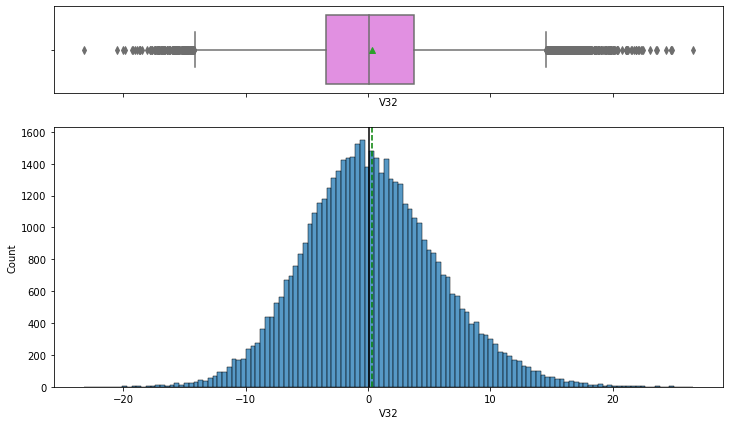

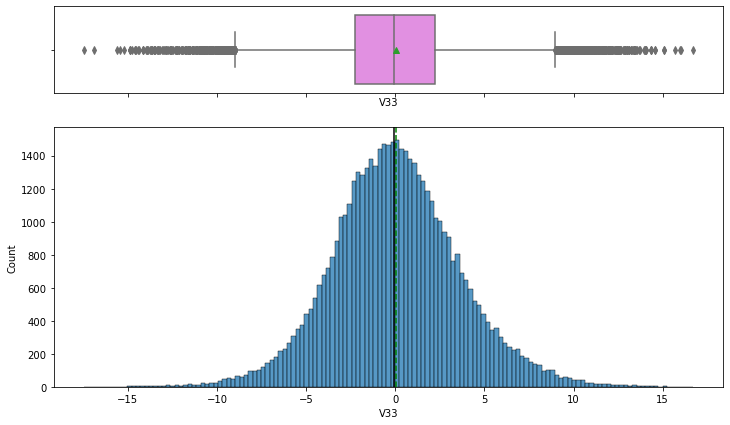

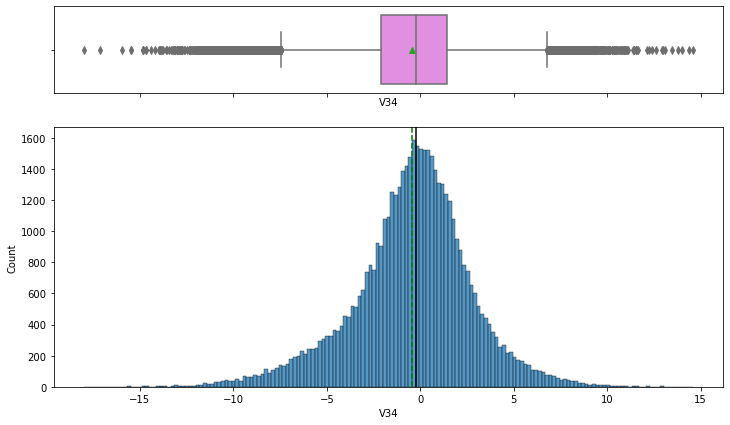

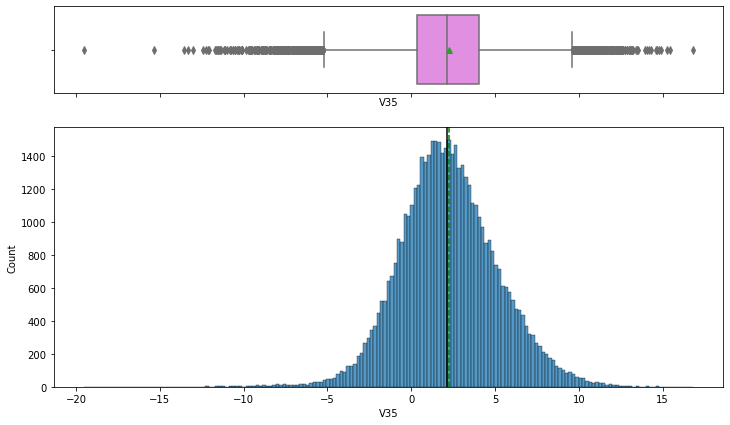

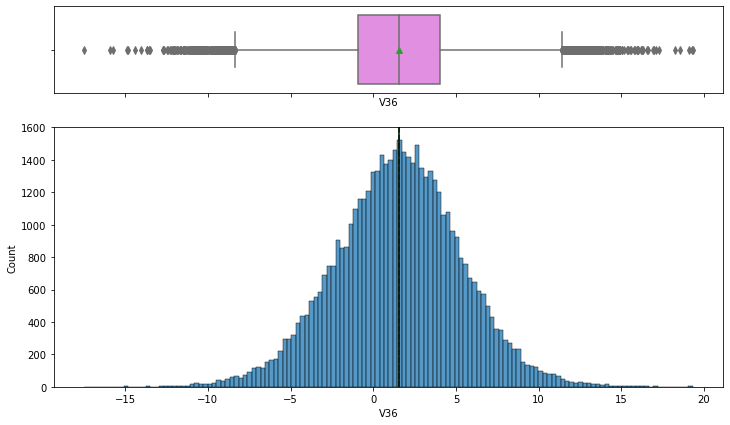

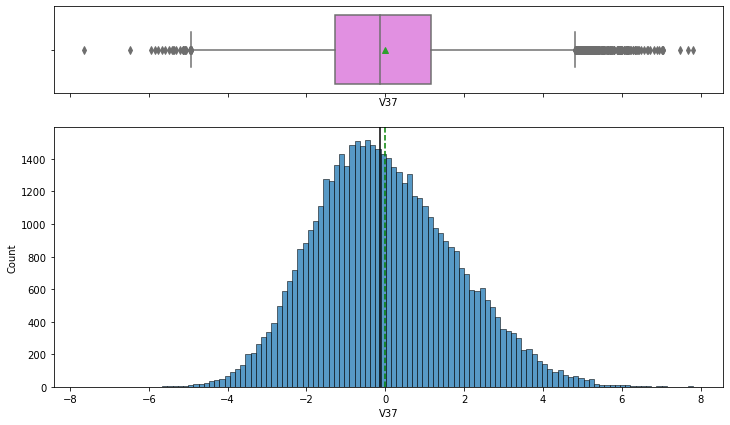

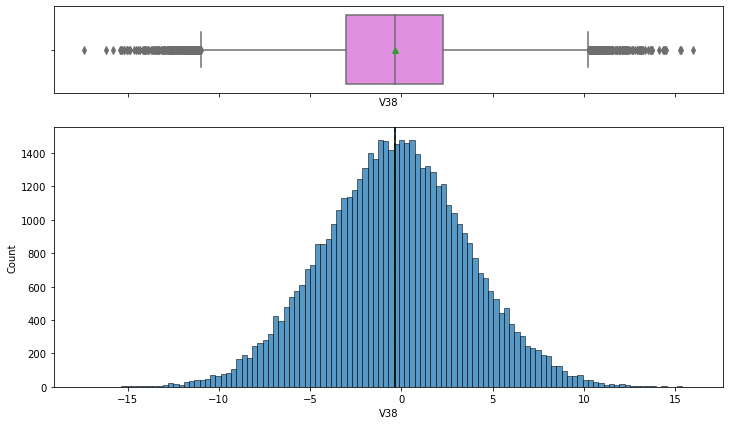

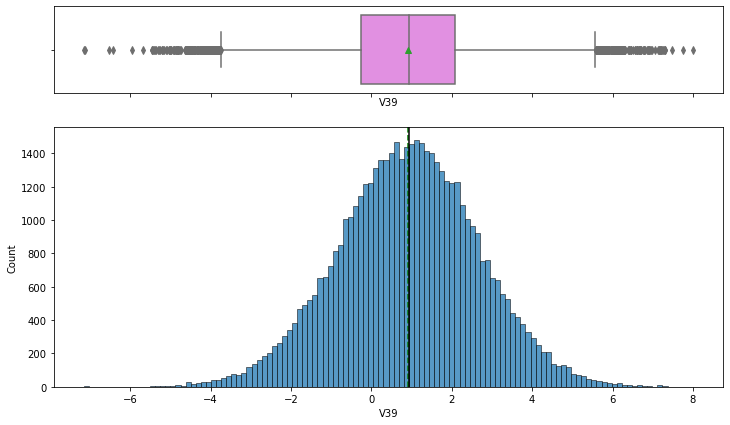

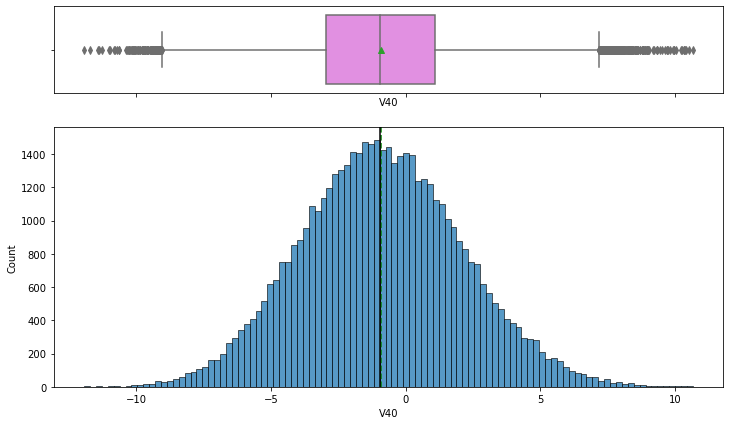

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [596]:
# build the histogram and boxplot for all the predictor variables
for column in cols:
        histogram_boxplot(data, column)


* Observations
* All the 40 columns have outliers on the left and right hand side of the distribution curve
* These outliers are valid datapoints and hence require no treatment
* All the 40 variables have uniform distribution forming close to a bell curve like shape

### Bivariate Analysis

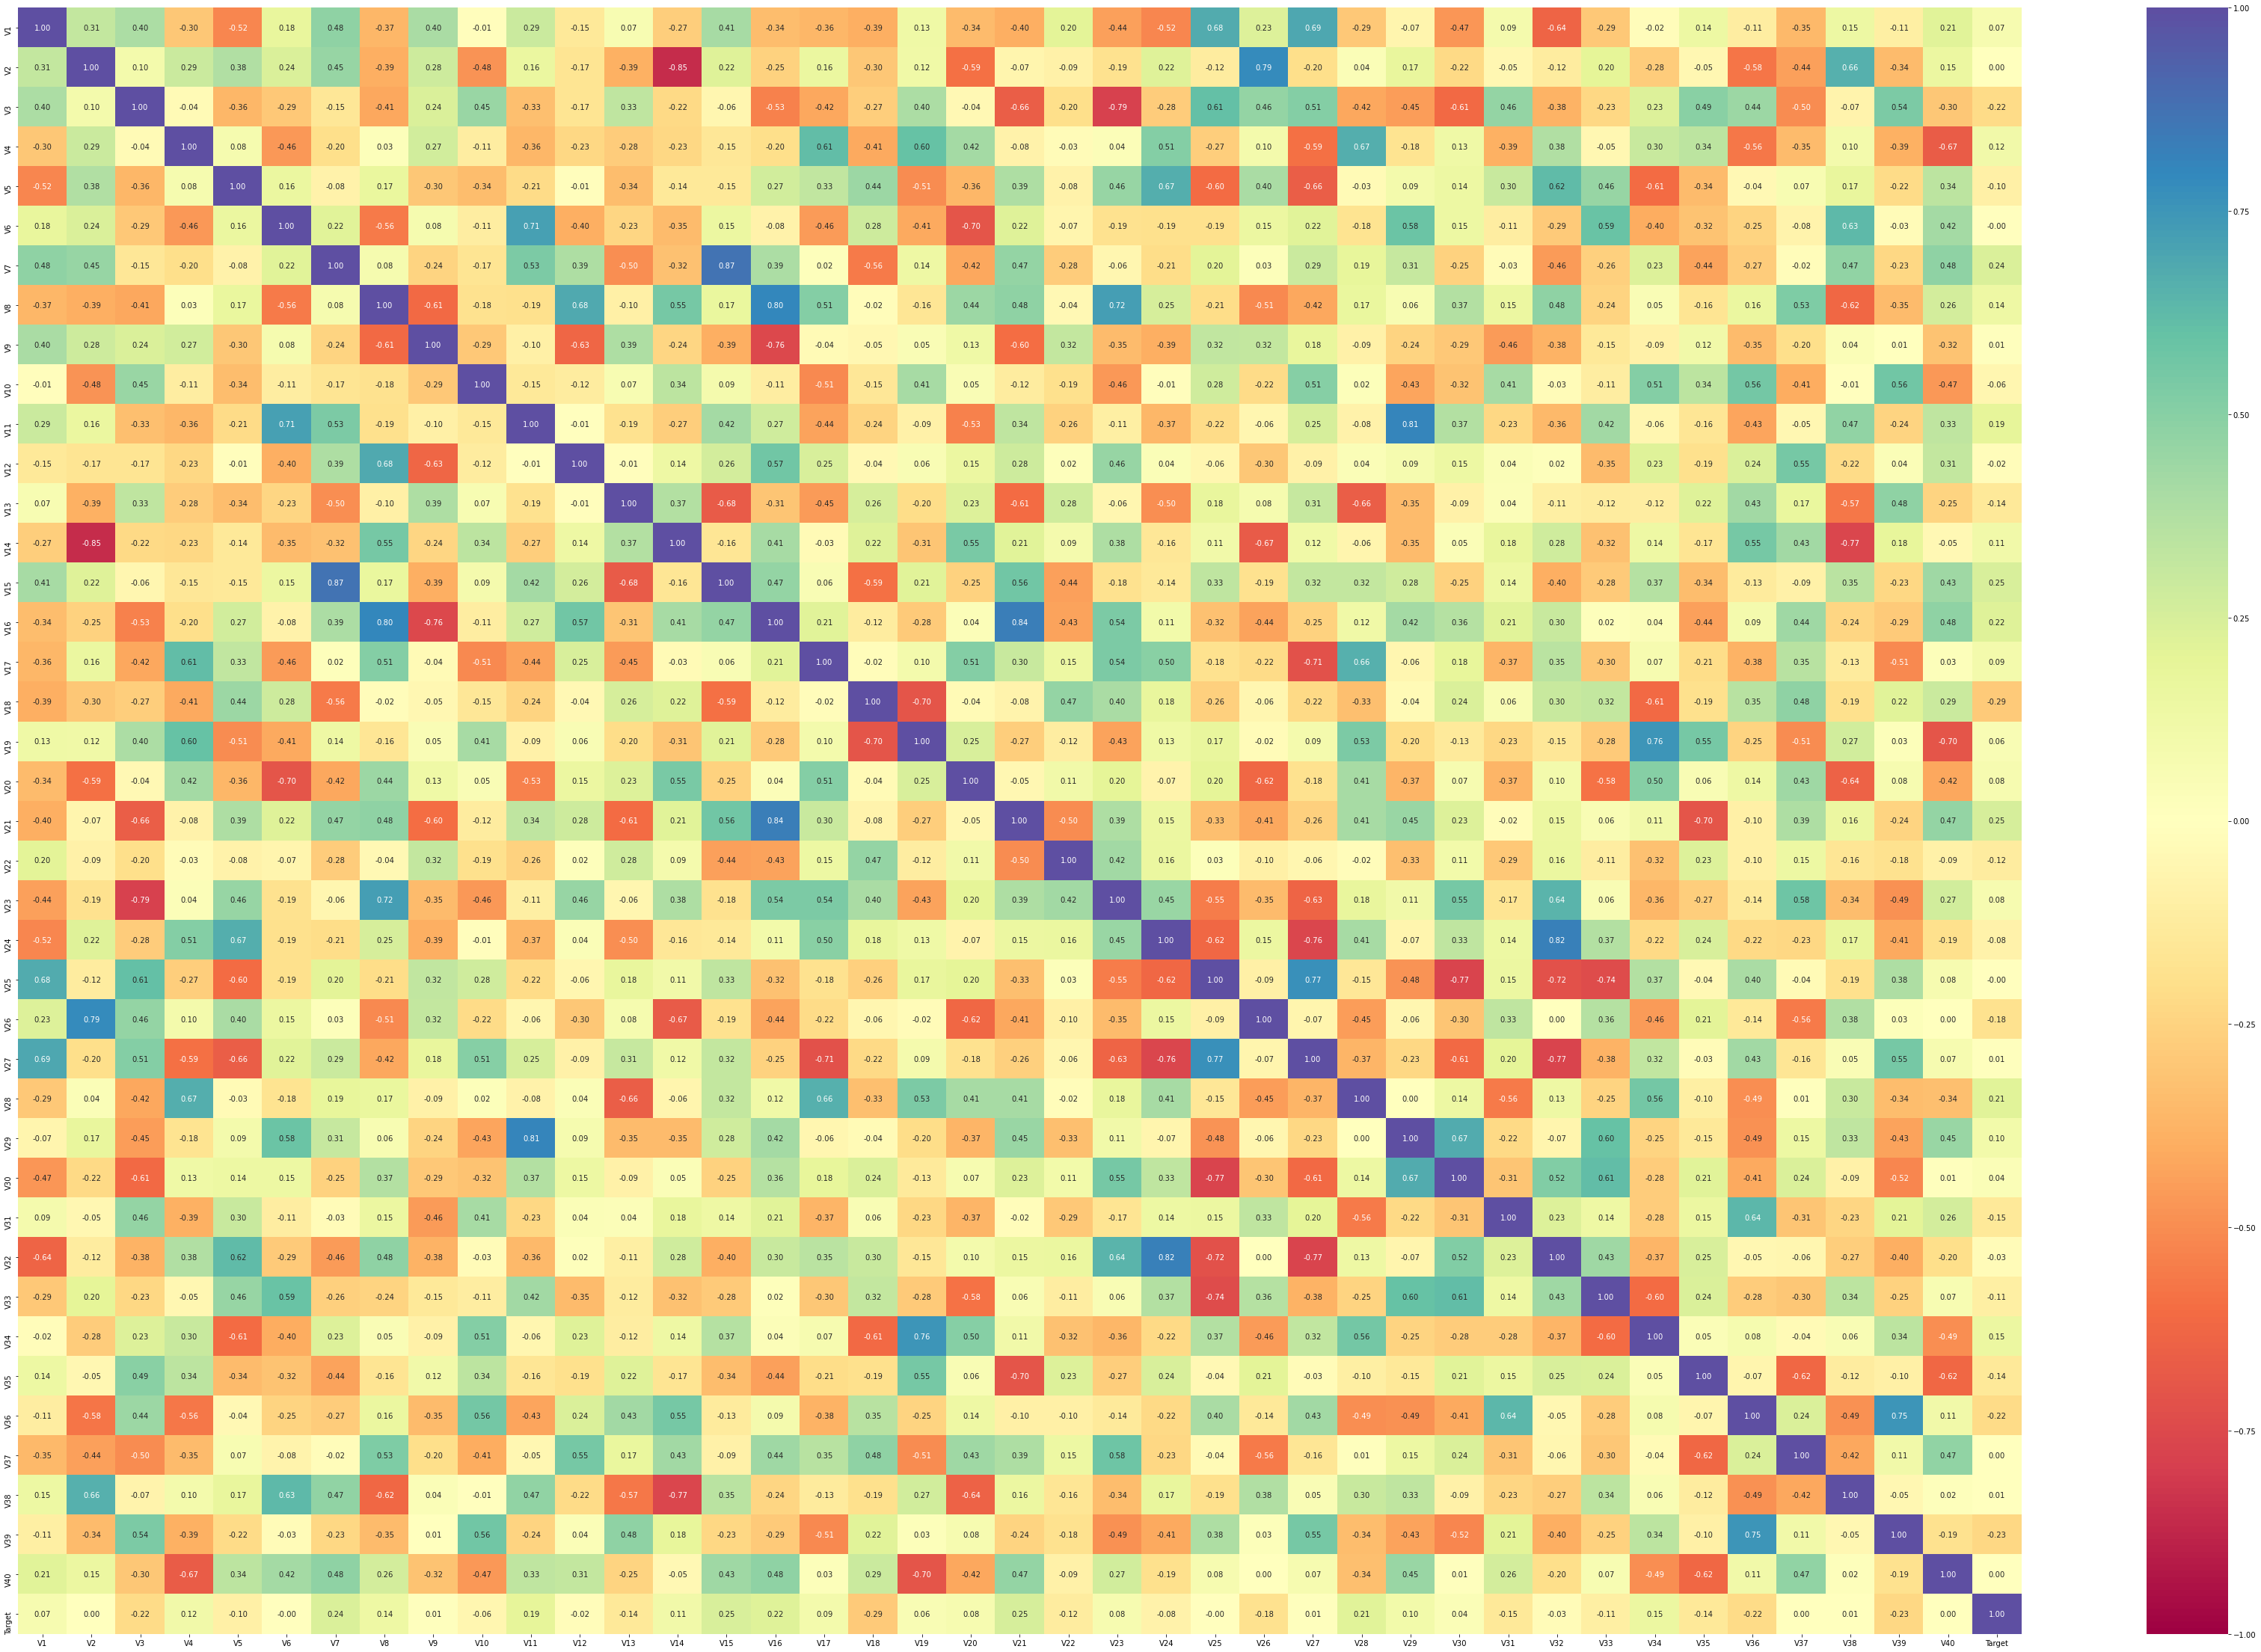

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [597]:
# let us check the heatmap for the correlations
plt.figure(figsize=(60, 40))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Observations
* The heatmap is difficult to visualize and eyeball for correlation greater than 0.5
* We will write a function that will help us print the values so that we can understand the correlation

In [598]:
# Checking for correlations > 0.5
corr = data.corr()
# corr[corr > 0.5].dropna(axis=1, how='all').replace(1., np.nan).dropna(how='all', axis=1).dropna(how='all', axis=0).apply(lambda x:x.dropna().to_dict() ,axis=1).to_dict()
corr[corr > 0.5].replace(1, np.nan)

V1        V2        V3        V4        V5        V6        V7  \
V1           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V2           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V3           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V4           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V5           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V6           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V7           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V8           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V9           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V10          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V11          NaN       NaN       NaN       NaN       NaN  0.711065  0.531419   
V12          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V13          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V14          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V15          NaN       NaN       NaN       NaN       NaN       NaN  0.870349   
V16          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V17          NaN       NaN       NaN  0.612700       NaN       NaN       NaN   
V18          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V19          NaN       NaN       NaN  0.599953       NaN       NaN       NaN   
V20          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V21          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V22          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V23          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V24          NaN       NaN       NaN  0.513432  0.665766       NaN       NaN   
V25     0.678074       NaN  0.605330       NaN       NaN       NaN       NaN   
V26          NaN  0.786833       NaN       NaN       NaN       NaN       NaN   
V27     0.690023       NaN  0.508570       NaN       NaN       NaN       NaN   
V28          NaN       NaN       NaN  0.669059       NaN       NaN       NaN   
V29          NaN       NaN       NaN       NaN       NaN  0.583677       NaN   
V30          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V31          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V32          NaN       NaN       NaN       NaN  0.621388       NaN       NaN   
V33          NaN       NaN       NaN       NaN       NaN  0.588739       NaN   
V34          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V35          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V36          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V37          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
V38          NaN  0.660713       NaN       NaN       NaN  0.631617       NaN   
V39          NaN       NaN  0.537108       NaN       NaN       NaN       NaN   
V40          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
Target       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

              V8  V9       V10  ...       V32       V33       V34       V35  \
V1           NaN NaN       NaN  ...       NaN       NaN       NaN       NaN   
V2           NaN NaN       NaN  ...       NaN       NaN       NaN       NaN   
V3           NaN NaN       NaN  ...       NaN       NaN       NaN       NaN   
V4           NaN NaN       NaN  ...       NaN       NaN       NaN       NaN   
V5           NaN NaN       NaN  ...  0.621388       NaN       NaN       NaN   
V6           NaN NaN       NaN  ...       NaN  0.588739       NaN       NaN   
V7           NaN NaN       NaN  ...       NaN       NaN       NaN       NaN   
V8           NaN NaN 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Observations
* Most of the variables have correlation
* As an example V1 is highly correlated with V25 and V27. 
* There are some variables that do not have a correlation greater than 0.5. An example of this would be V9.

### Bivariate Analysis

In [599]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

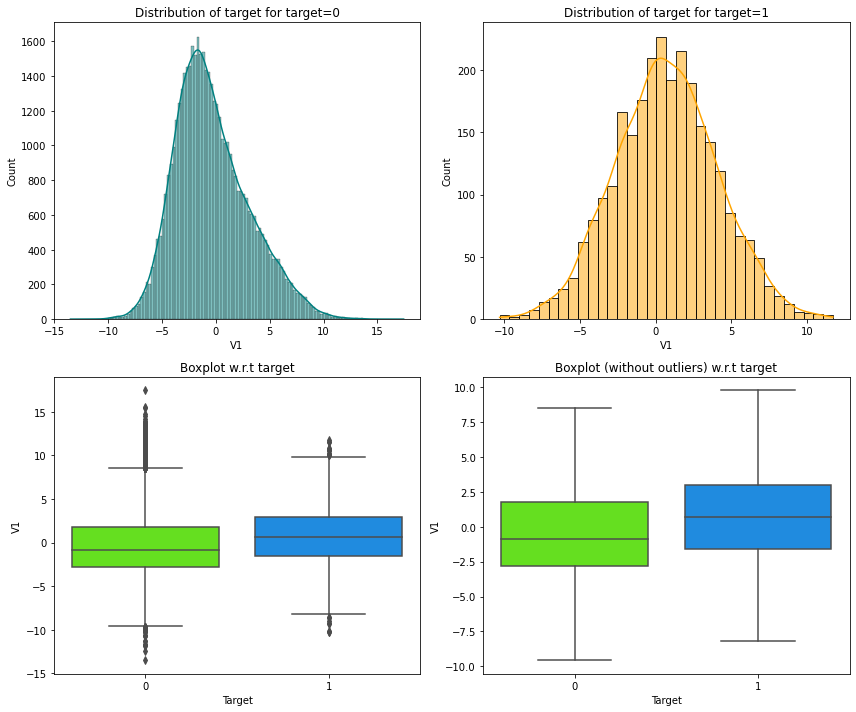

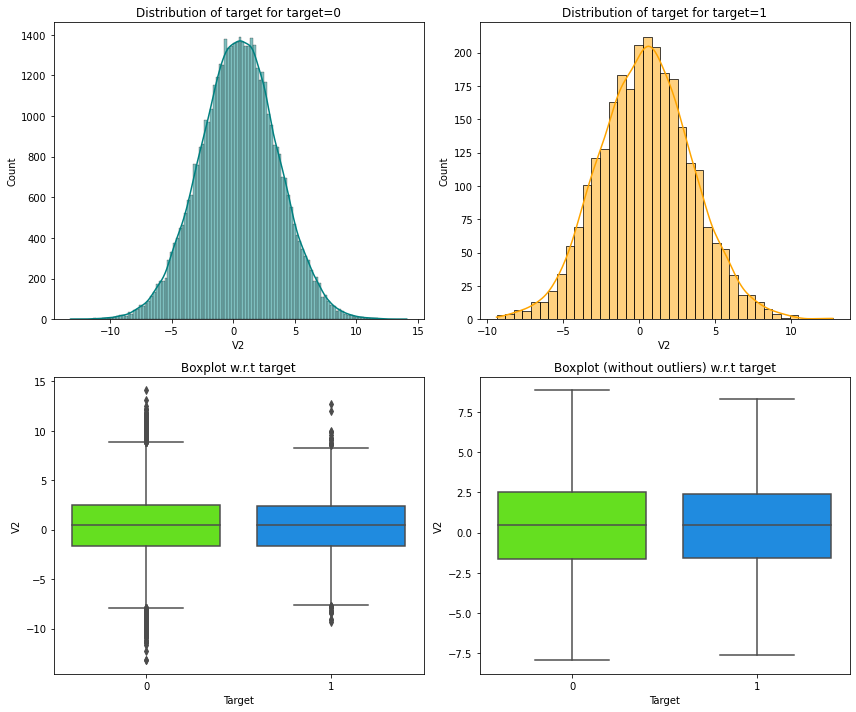

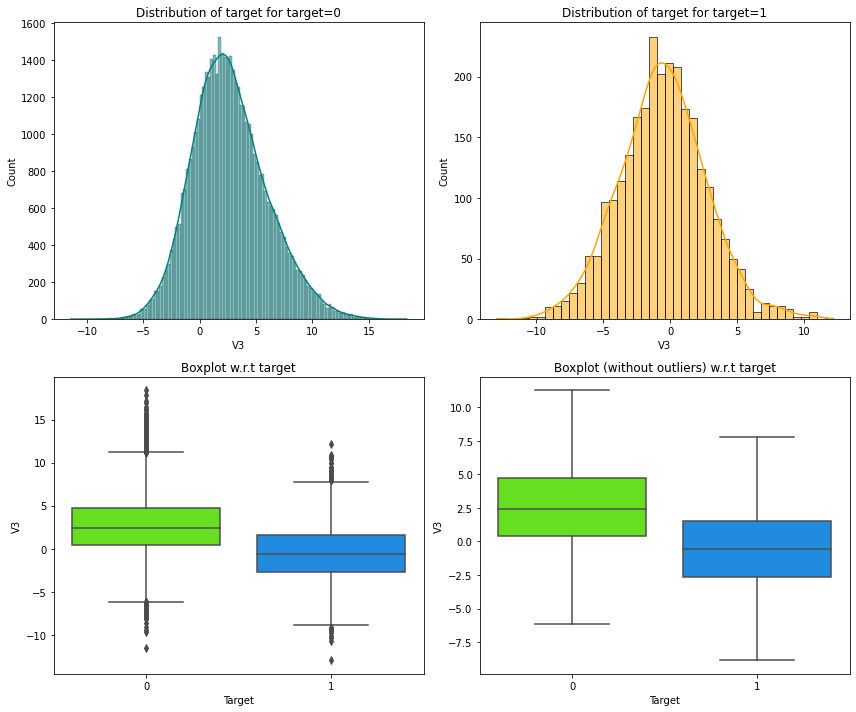

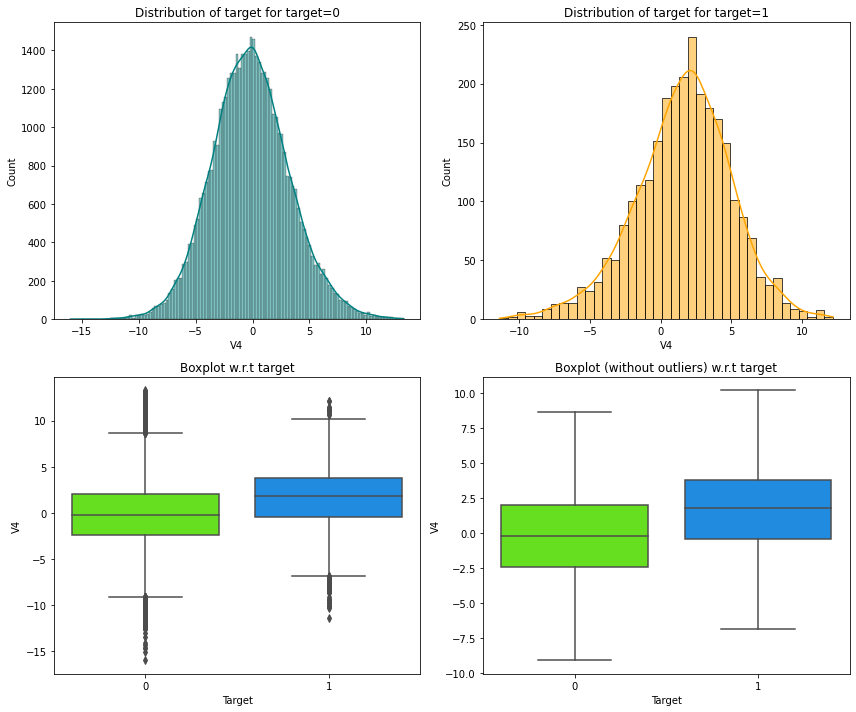

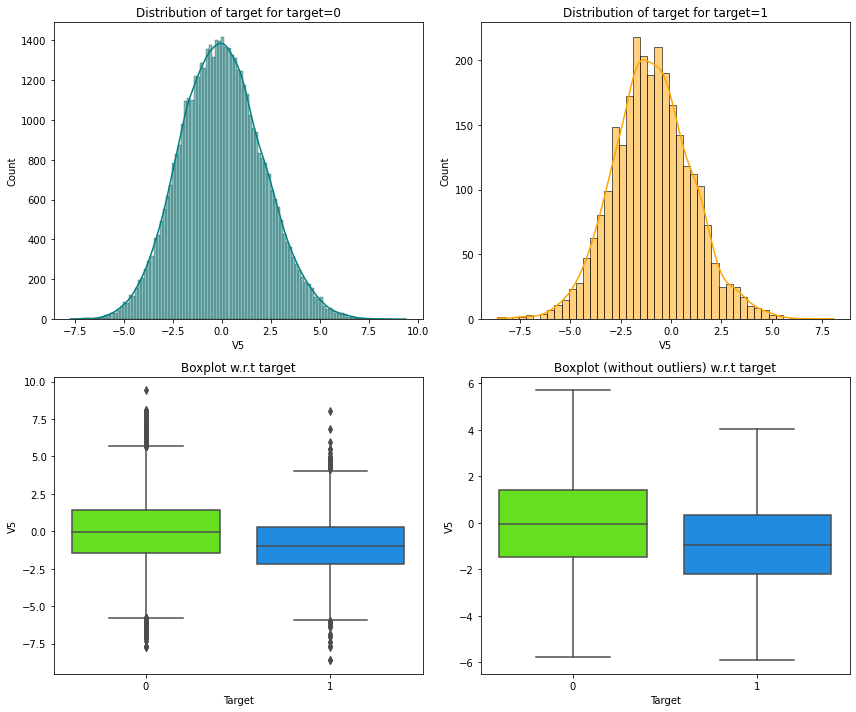

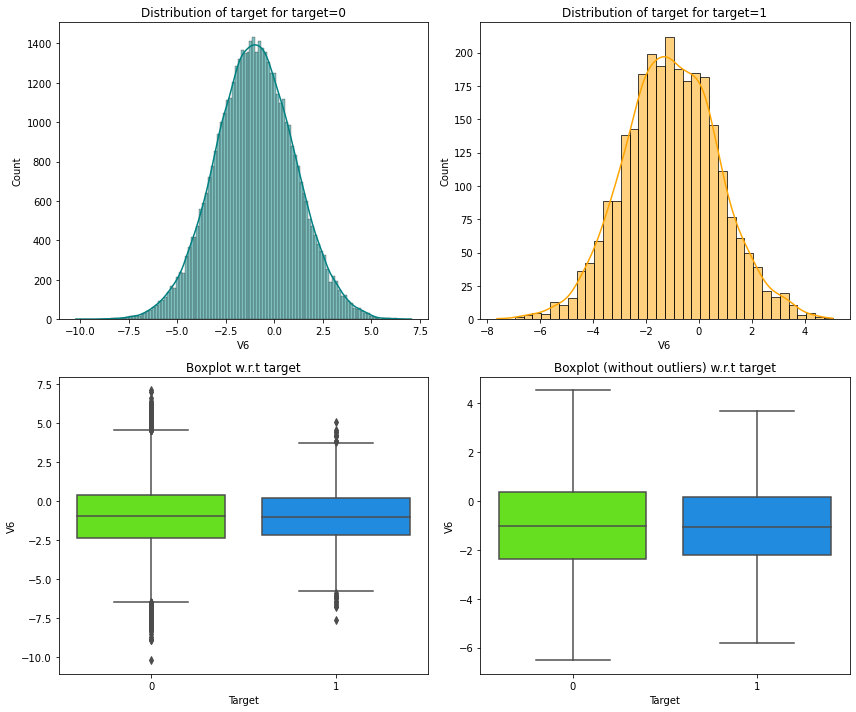

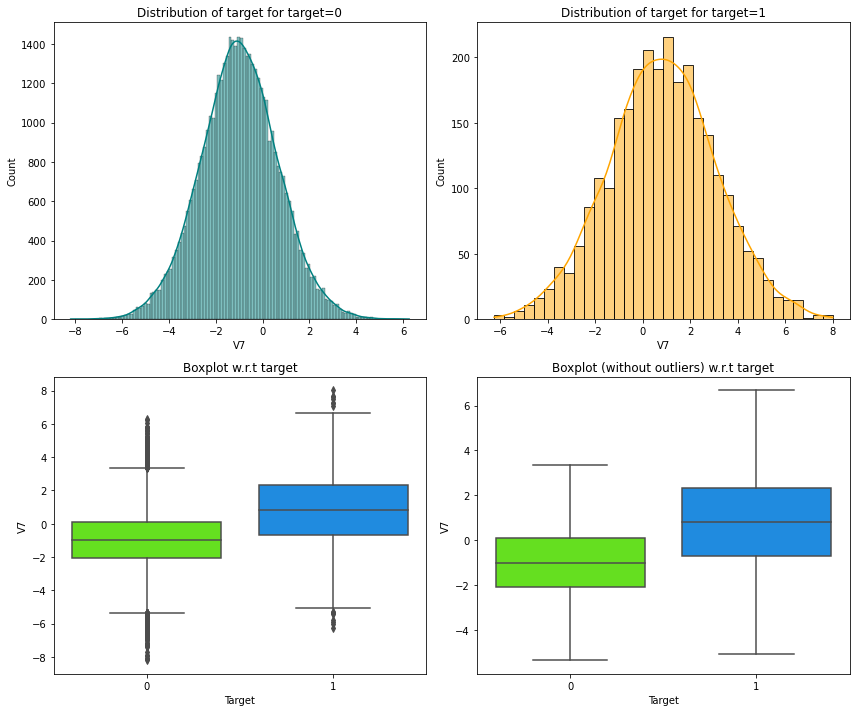

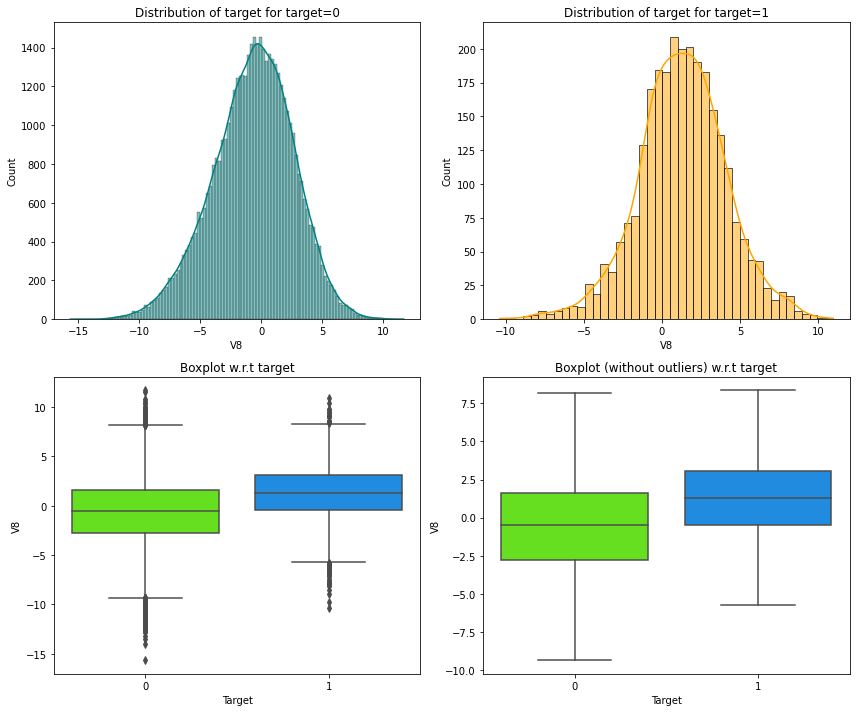

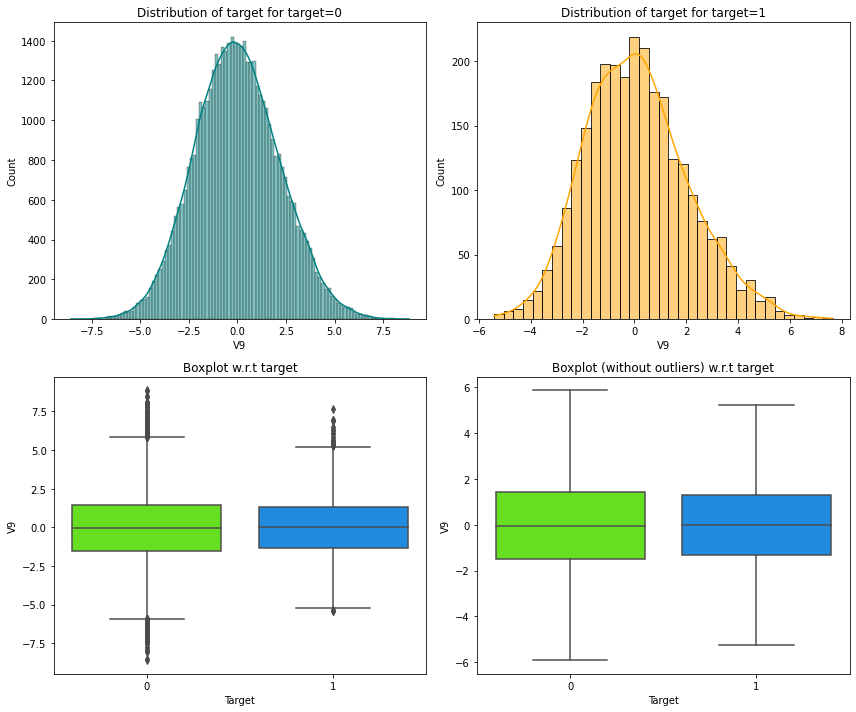

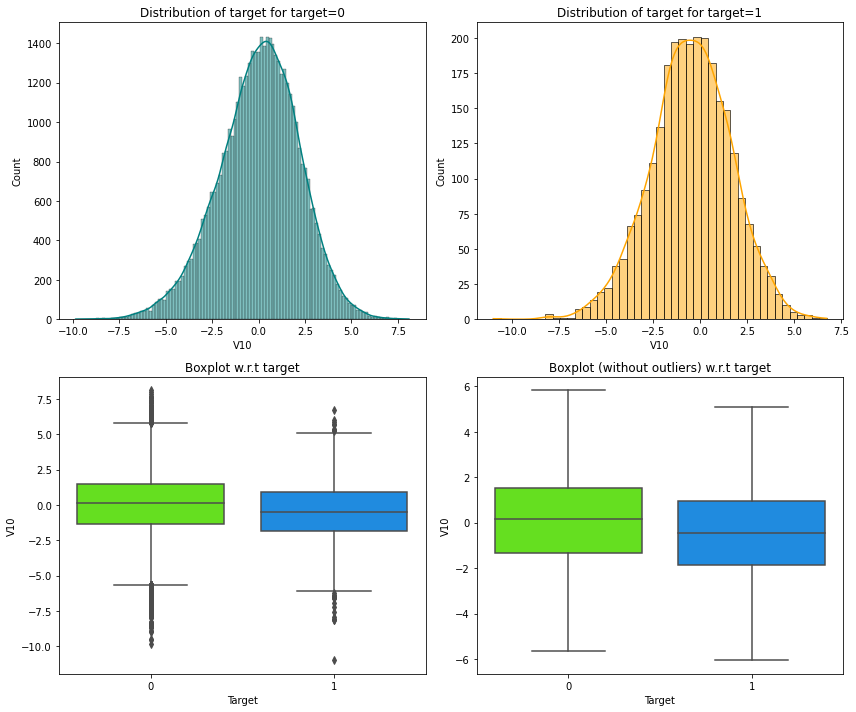

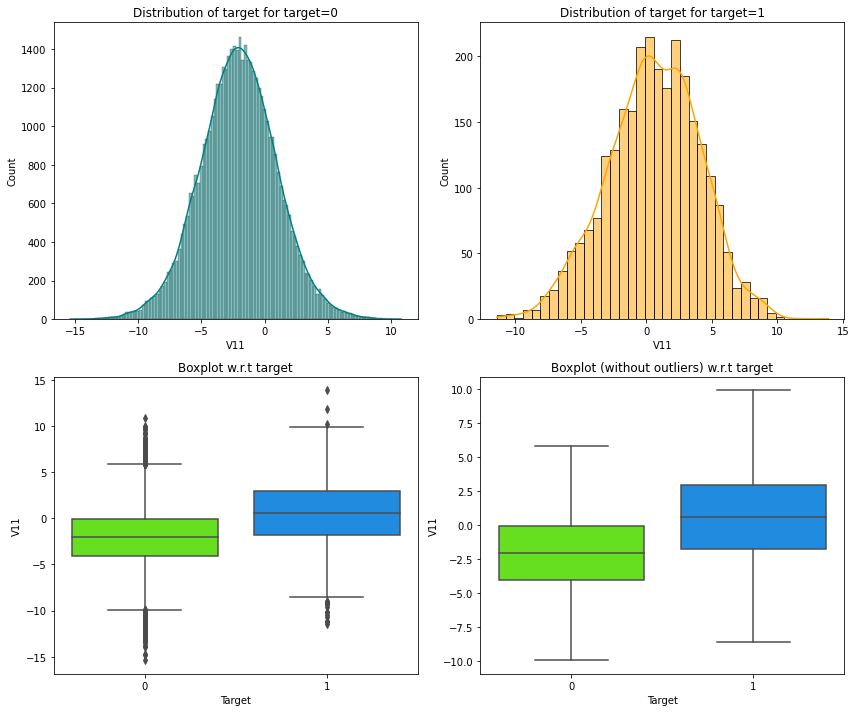

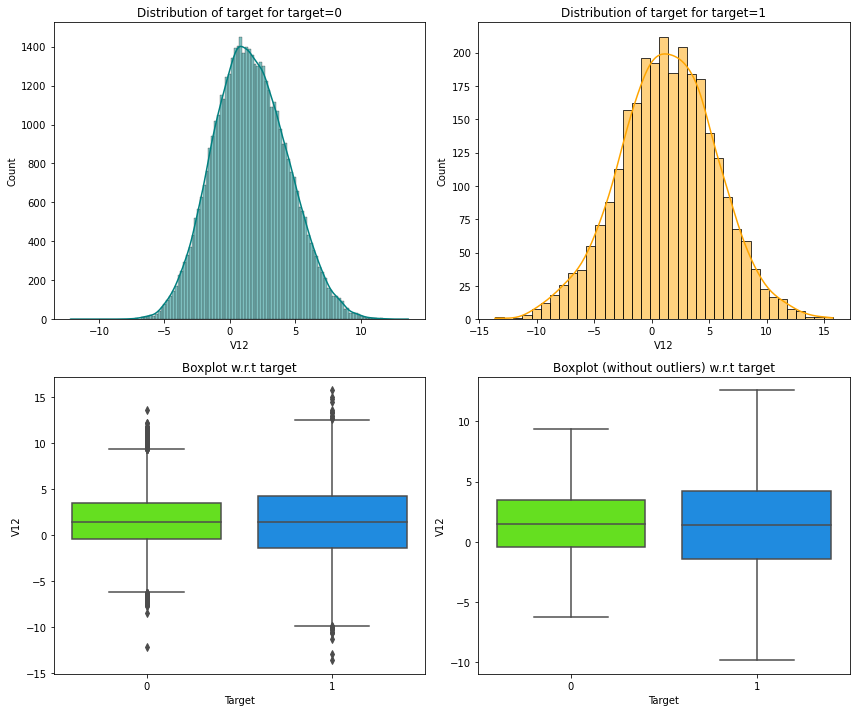

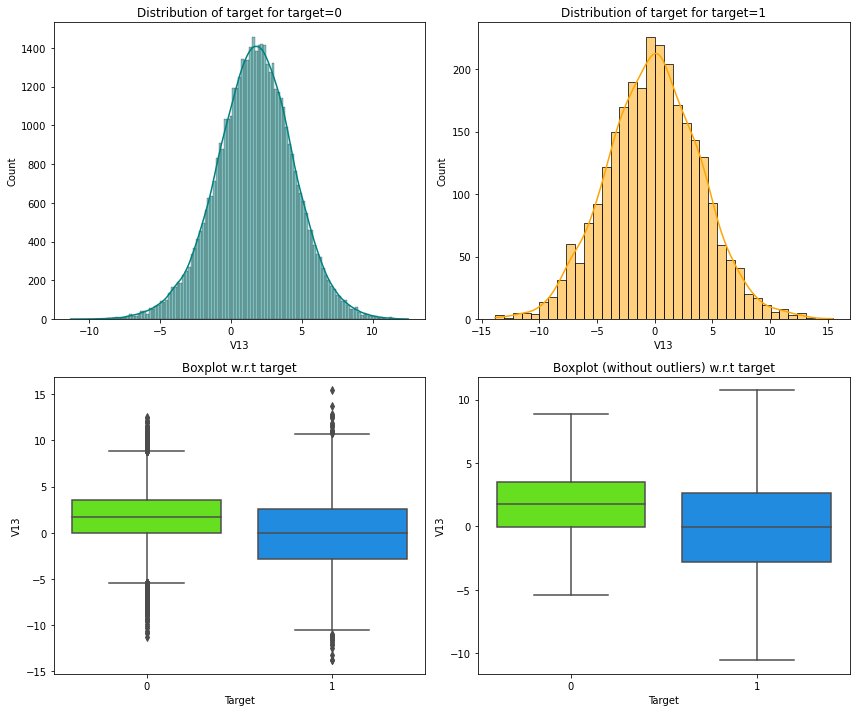

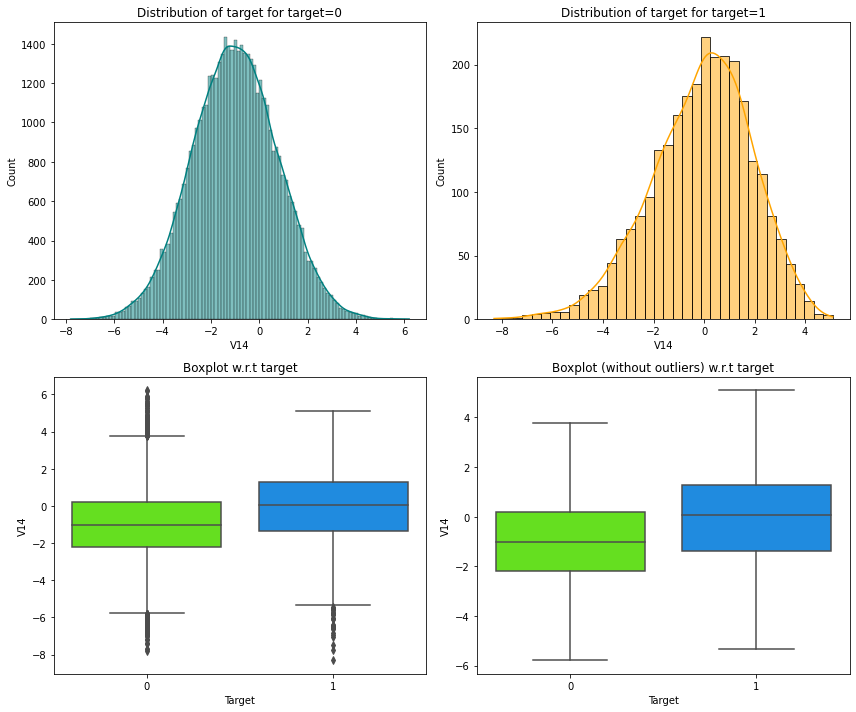

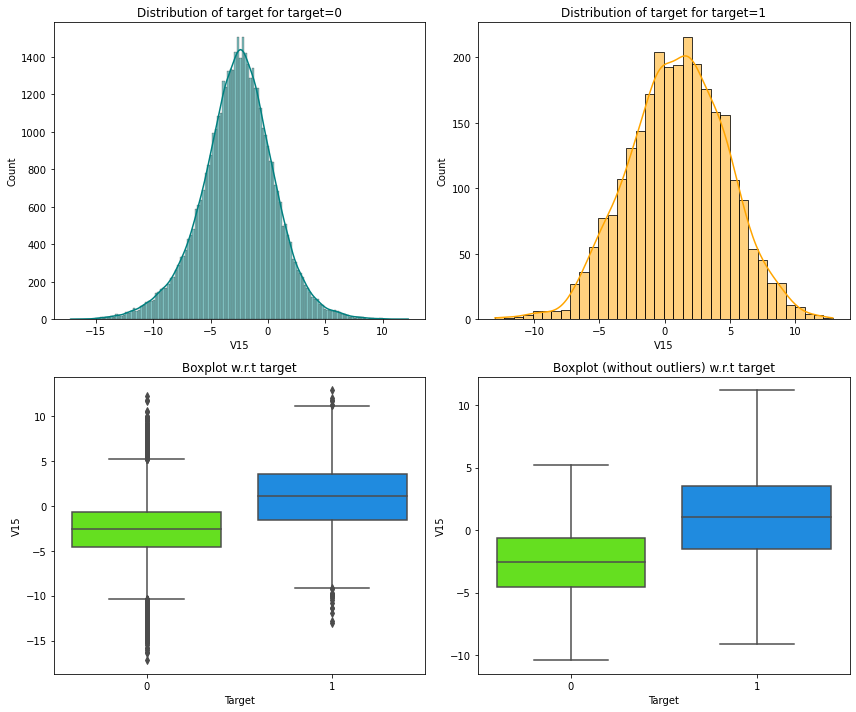

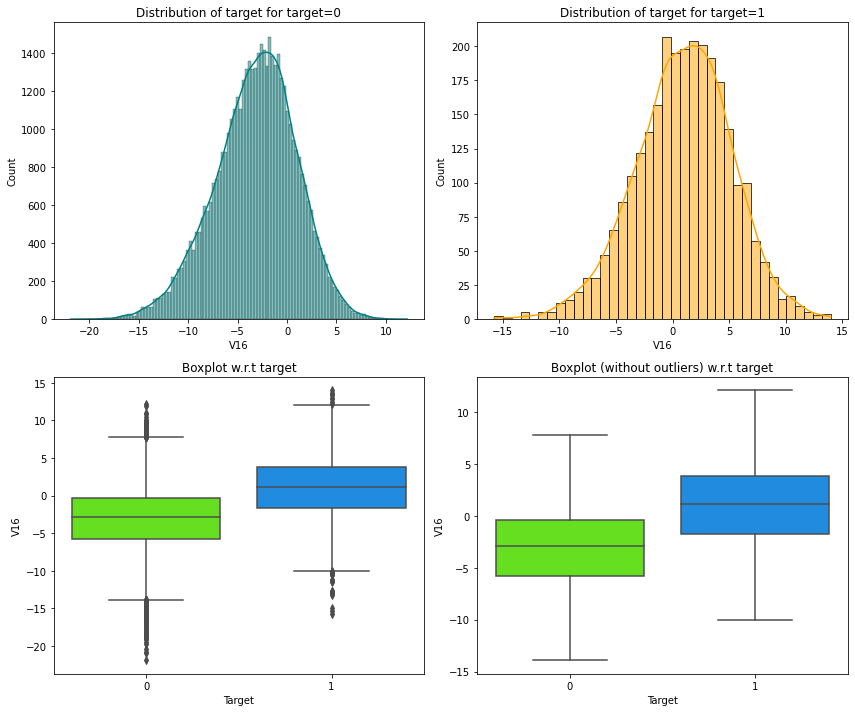

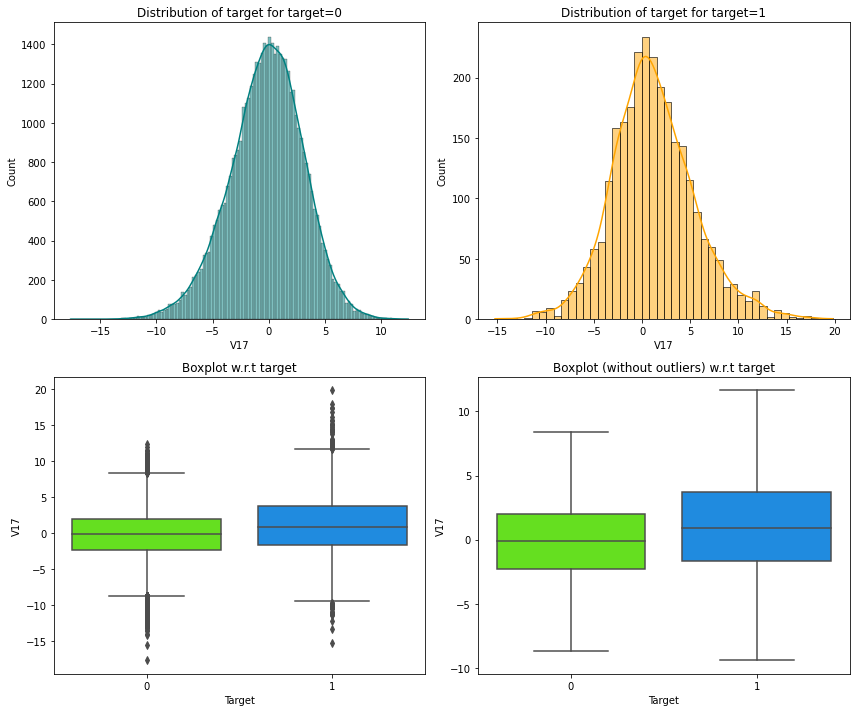

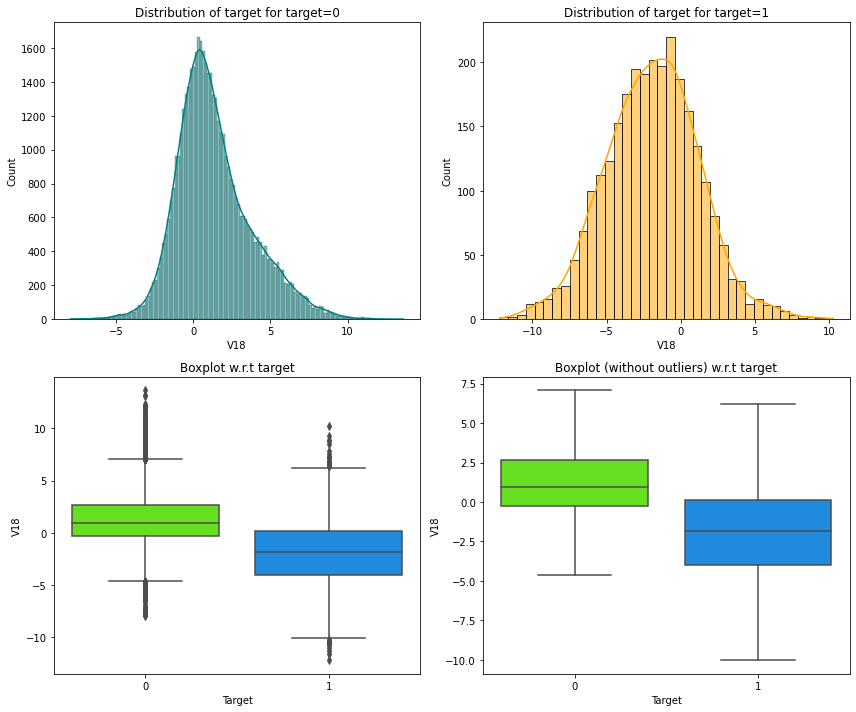

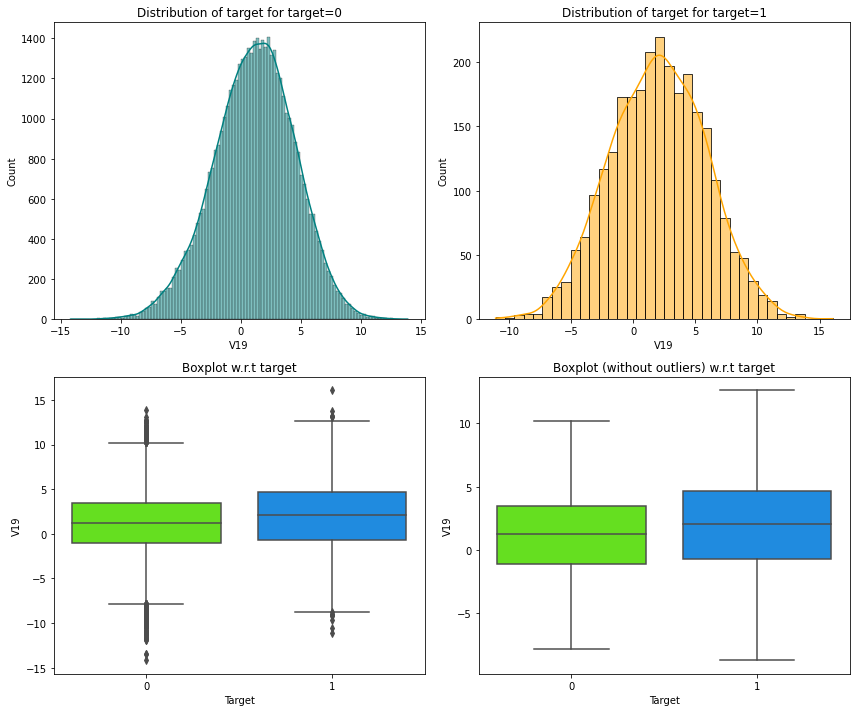

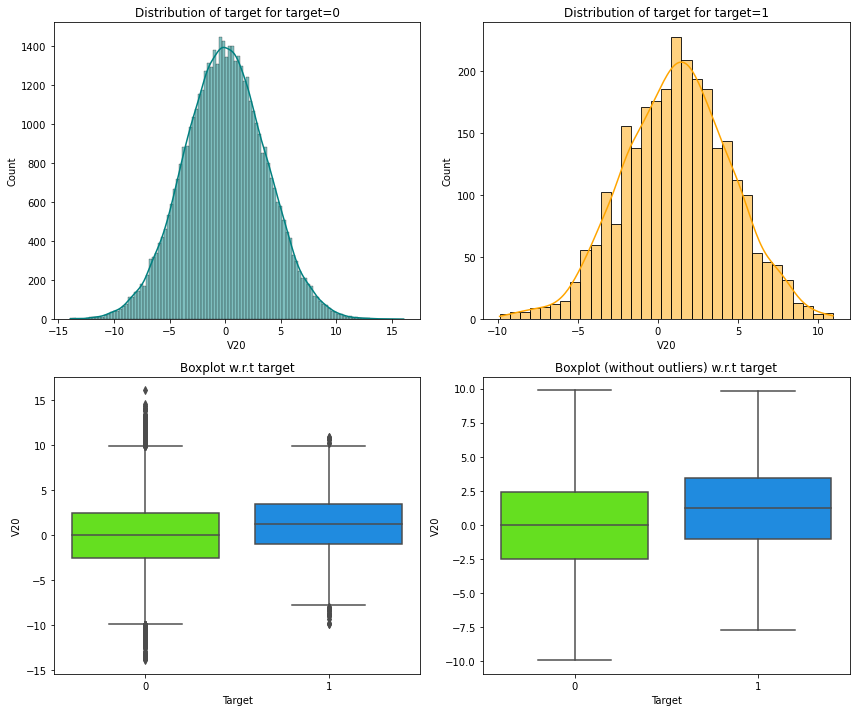

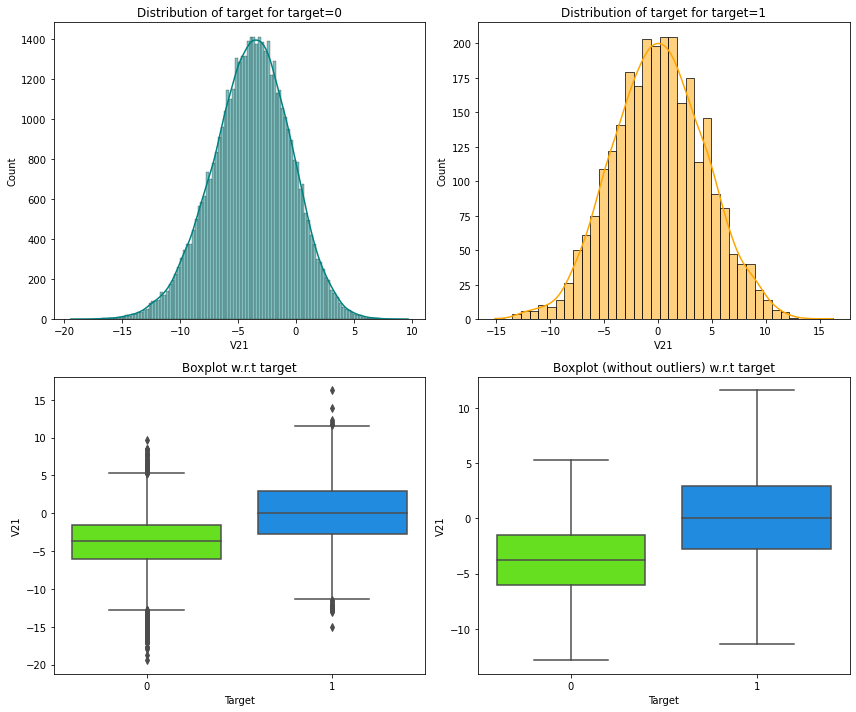

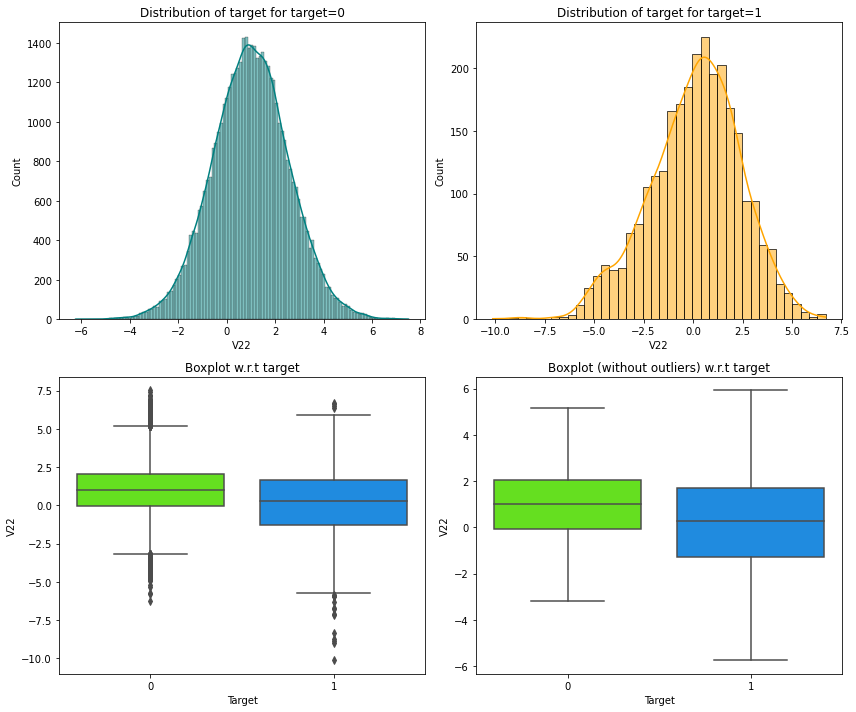

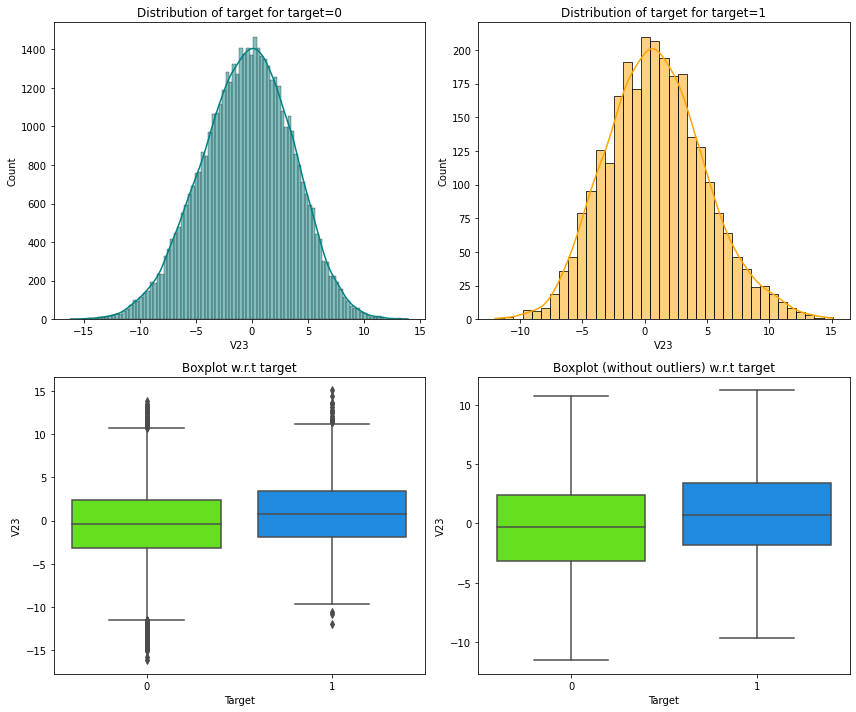

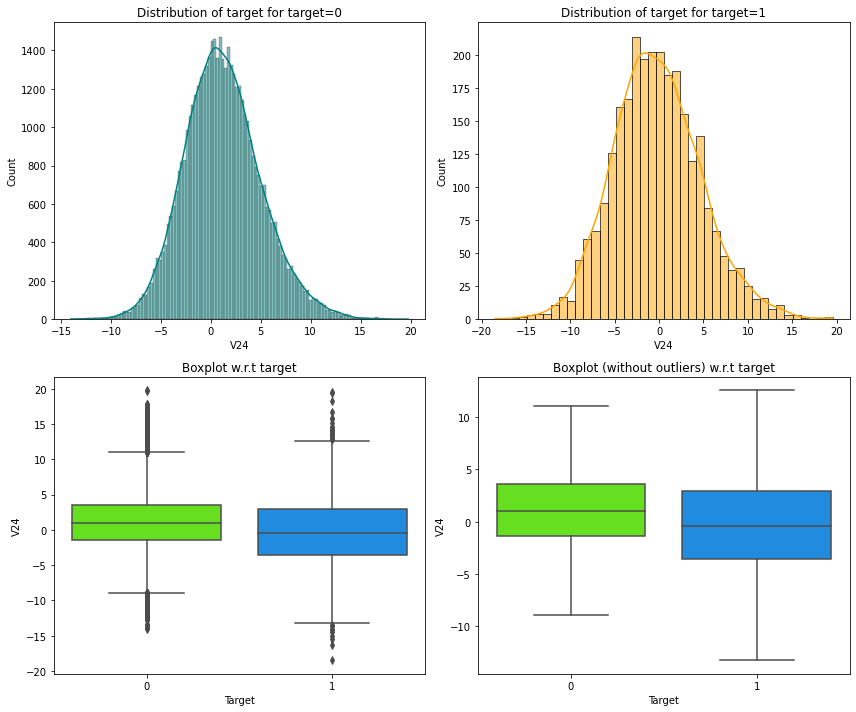

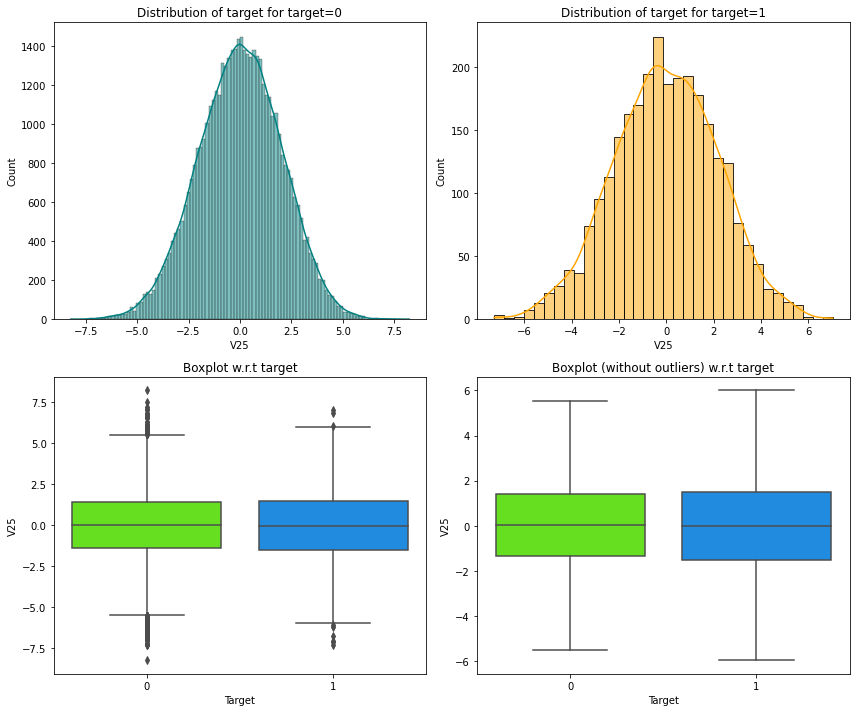

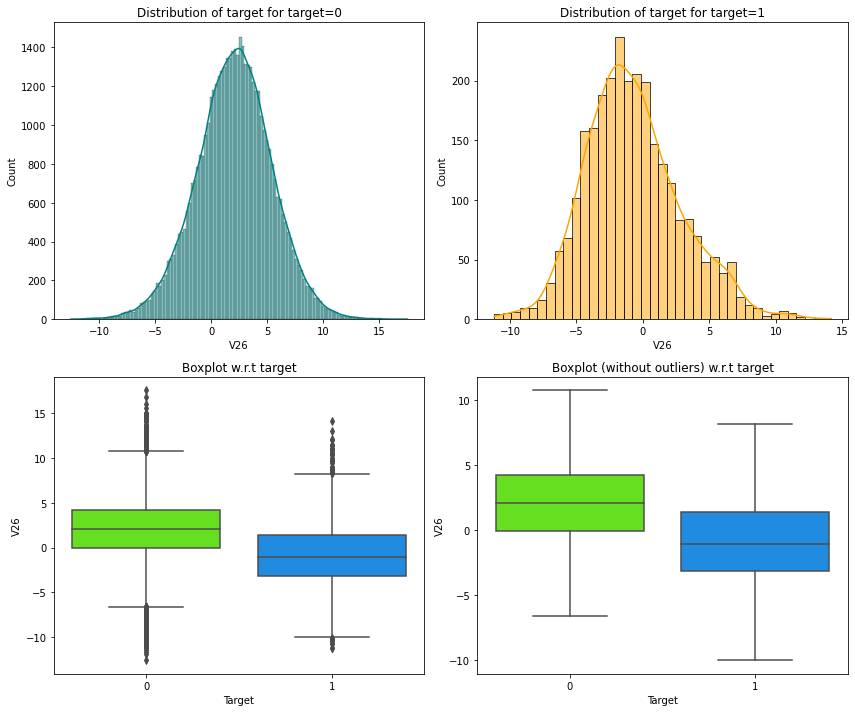

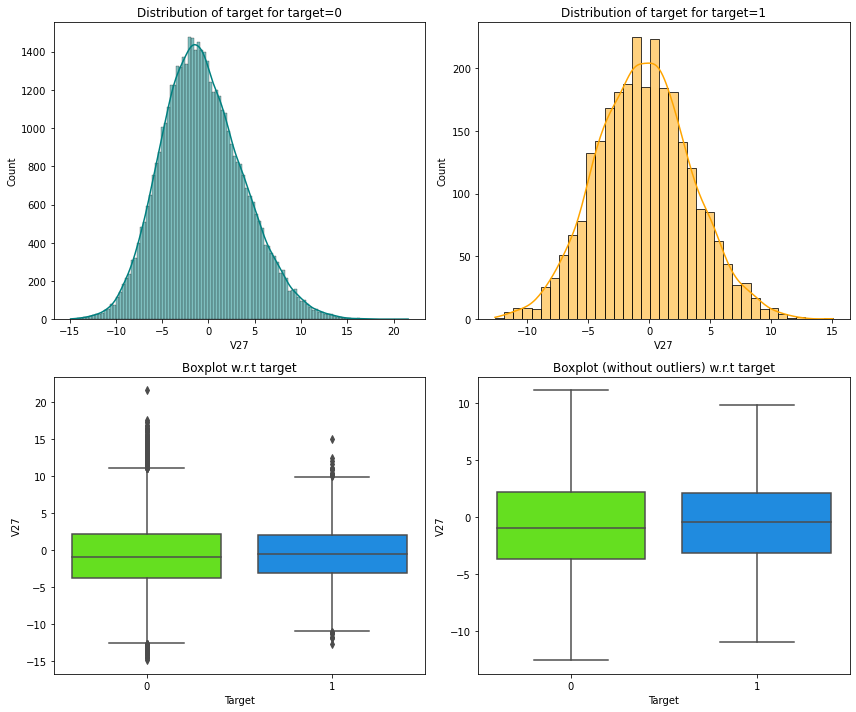

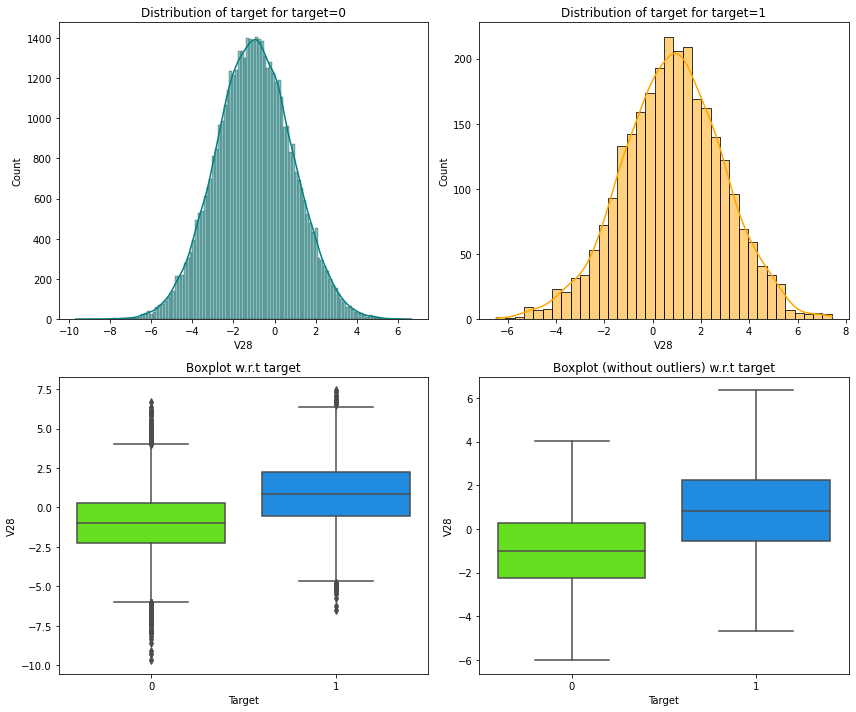

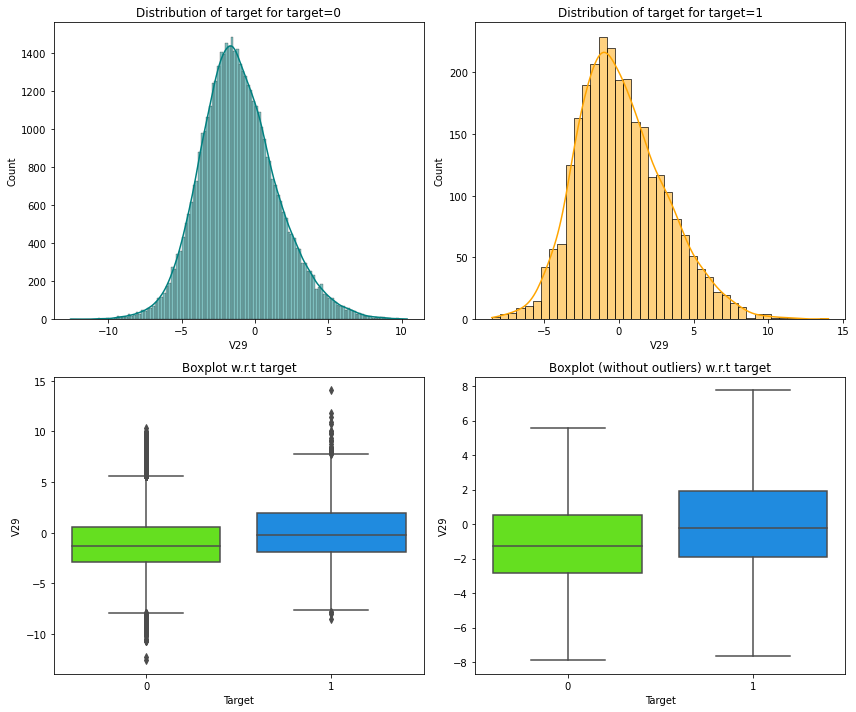

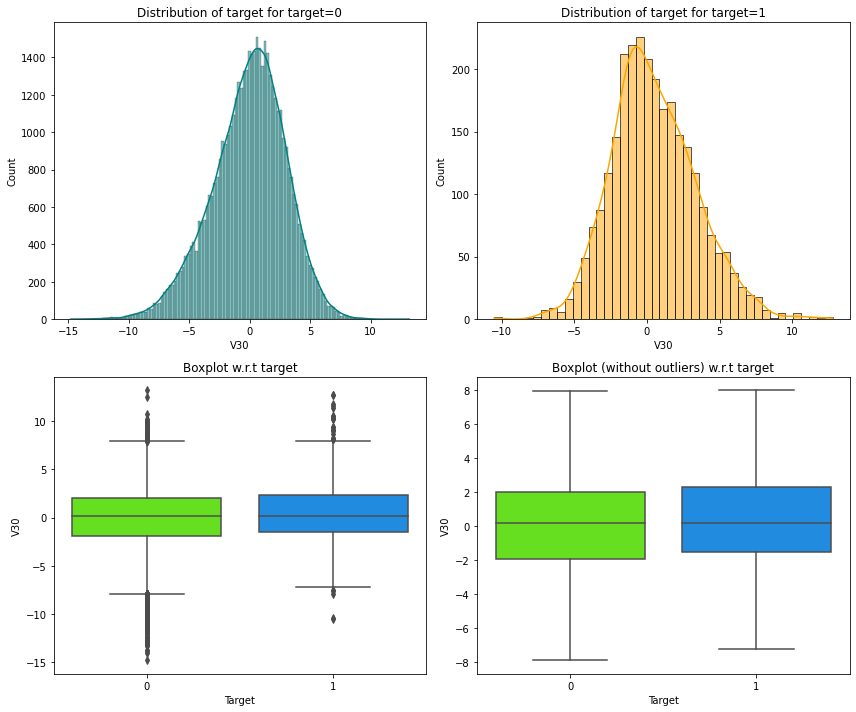

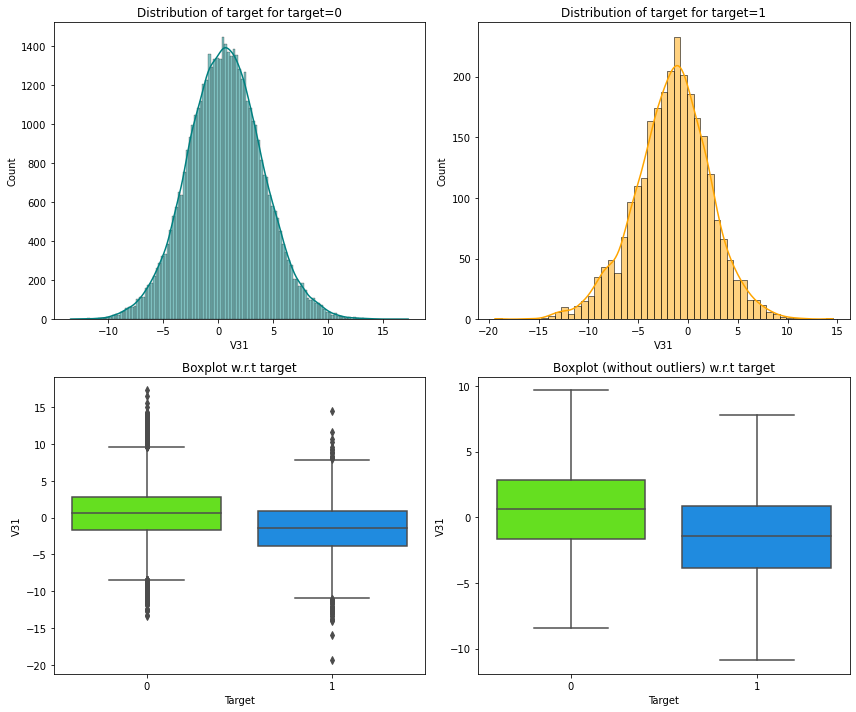

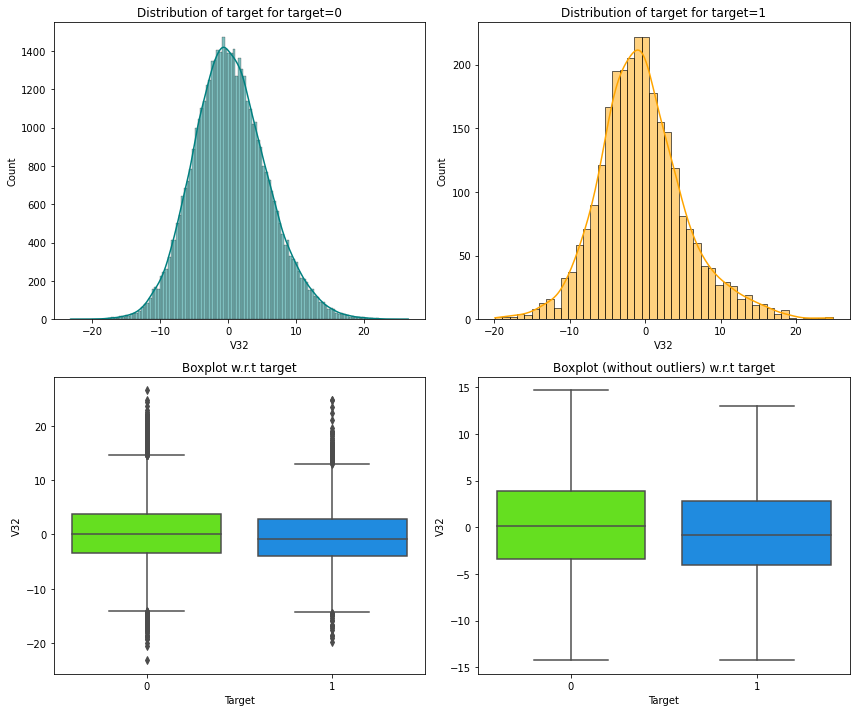

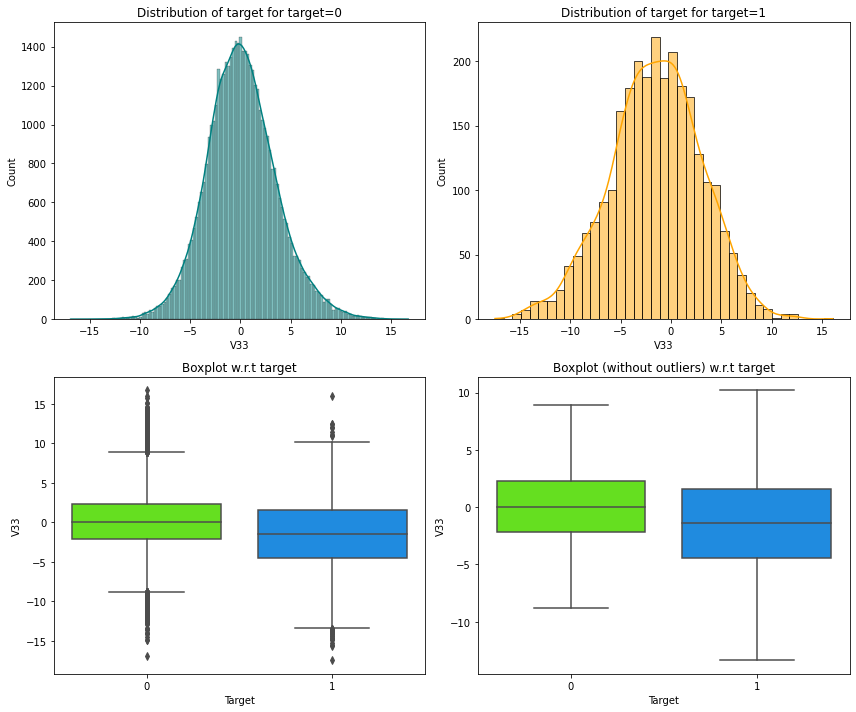

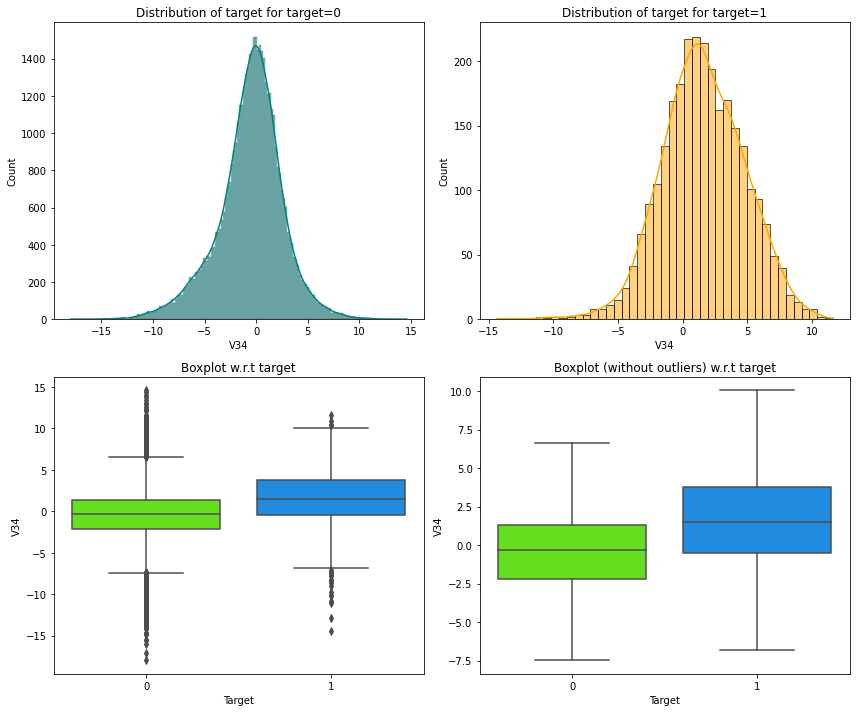

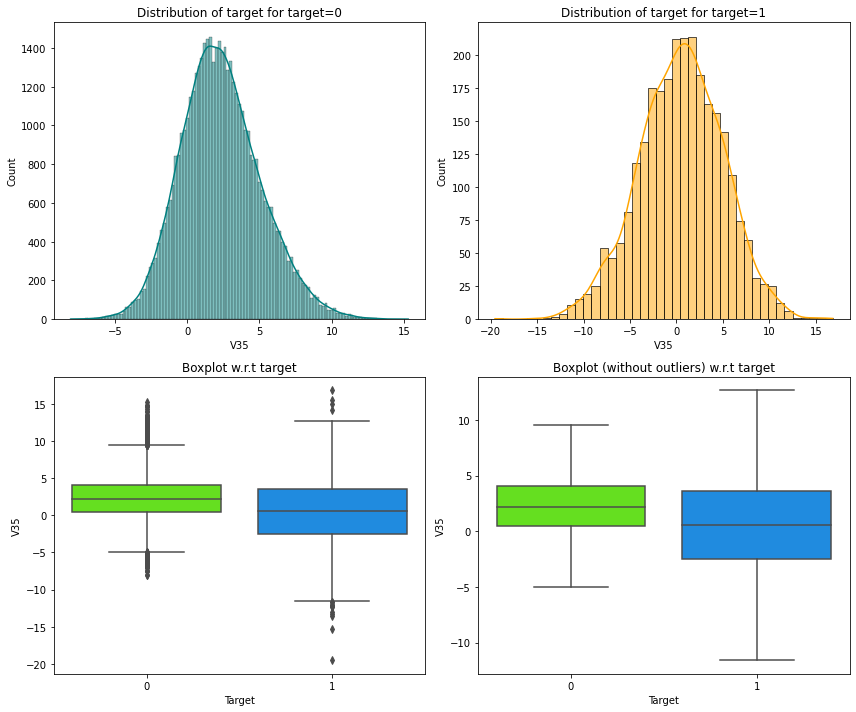

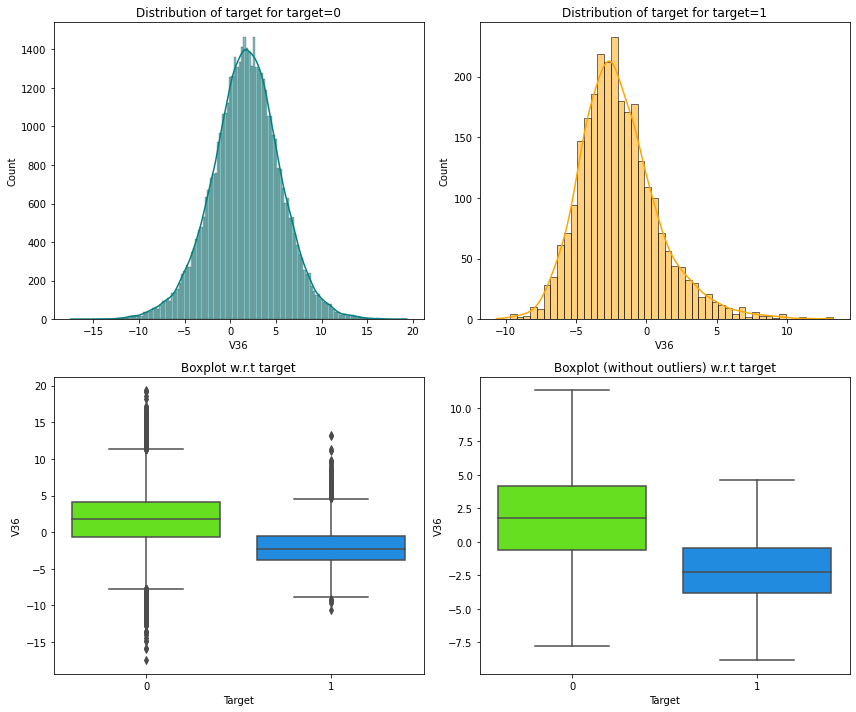

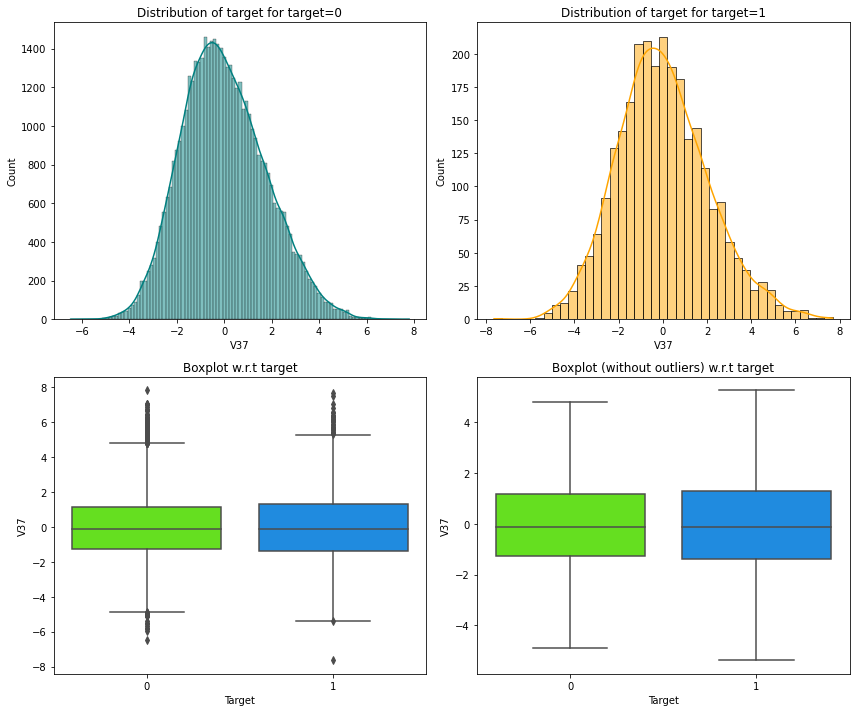

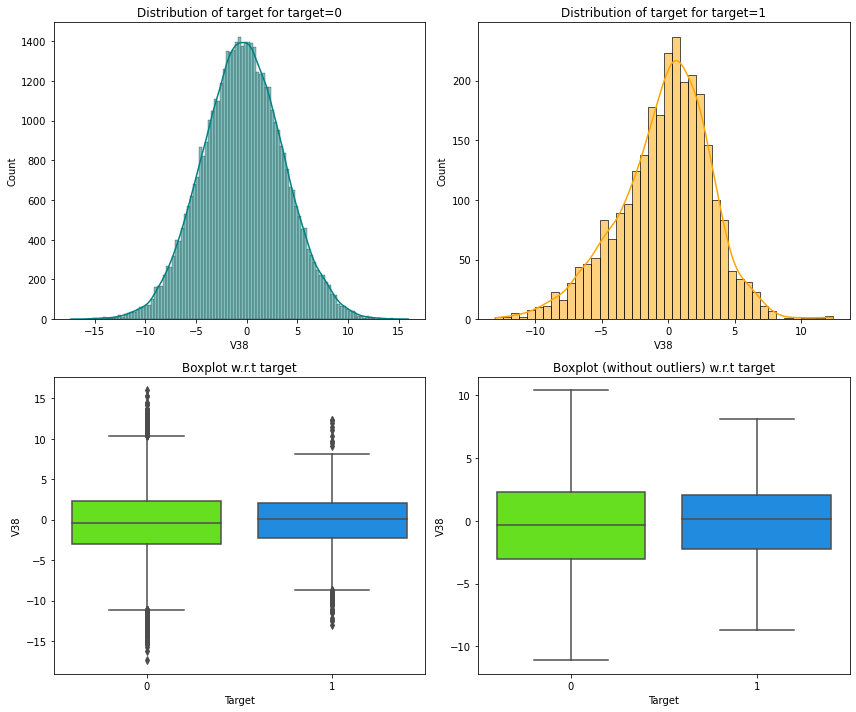

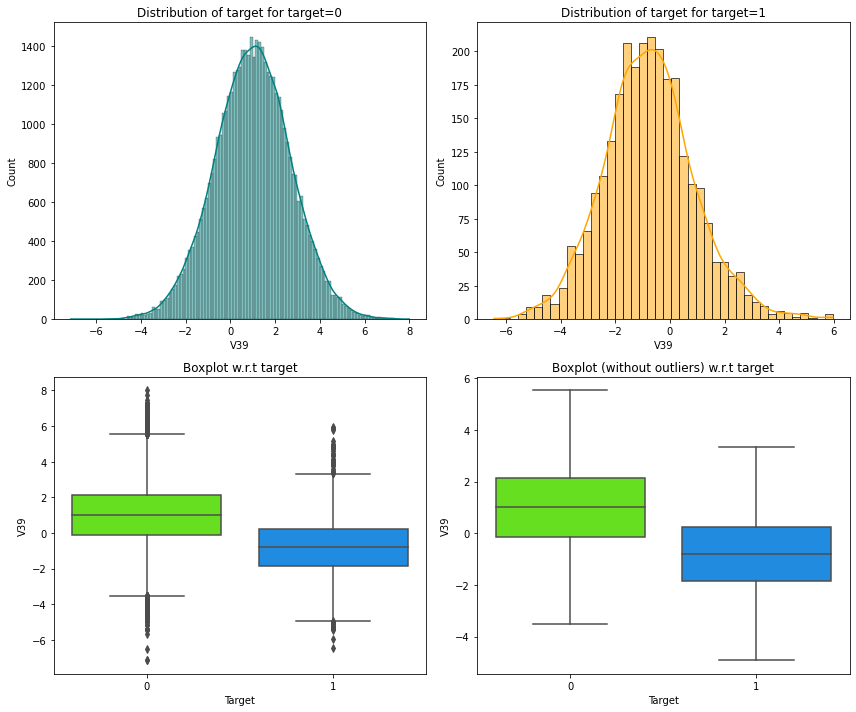

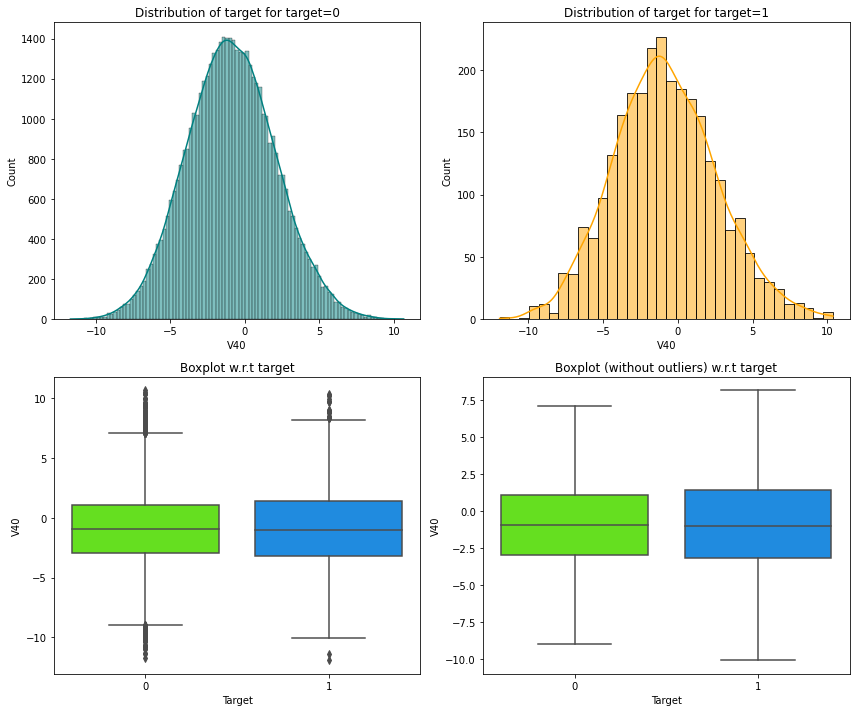

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [600]:
# build the histogram and boxplot for all the predictor variables
# use the for loop to iterate through all the variables
for column in cols:
    distribution_plot_wrt_target(data, column, "Target")

* The distribution plot of the predictor variables with respect to the target shows a bell curve pattern
* There are outliers in each of the predictor variables
* This is consistent with what we saw earlier during the univariate analysis of the predictor variables

## Data Pre-processing

* Check for missing values in the dataset

In [601]:
data.isnull().sum()

V1        57
V2        46
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* We see missing values in V1 & V2. We will have to treat these predictor variables
* Since the total volume of records in this dataset is 40000.the missing values of 103 rows is very less. However to maintain the sanity of the data,I will impute them with KNN imputer so that it is treated and not causing any variations in further steps
* At this point we will switch back to having the train & test datasets separate and treat each of them separately

In [602]:
imputer = KNNImputer(n_neighbors=5)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [603]:
# defining a list with names of columns that will be used for imputation
reqd_col_for_impute = ["V1", "V2"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [604]:
# Fit and transform the train data
renew_train[reqd_col_for_impute] = imputer.fit_transform(
    renew_train[reqd_col_for_impute]
)
# Transform the test data
renew_test[reqd_col_for_impute] = imputer.transform(renew_test[reqd_col_for_impute])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [605]:
# Check if any values are missing after median imputation in train dataset
renew_train.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [606]:
# Check if any values are missing after median imputation in train dataset
renew_test.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
V29       0
V30       0
V31       0
V32       0
V33       0
V34       0
V35       0
V36       0
V37       0
V38       0
V39       0
V40       0
Target    0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [607]:
# Review first 5 rows again of the train dataset
renew_train.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -4.464606 -4.679129  3.101546  0.506130 -0.221083 -2.032511 -2.910870   
1 -2.909996 -2.568662  4.109032  1.316672 -1.620594 -3.827212 -1.616970   
2  4.283674  5.105381  6.092238  2.639922 -1.041357  1.308419 -1.876140   
3  3.365912  3.653381  0.909671 -1.367528  0.332016  2.358938  0.732600   
4 -3.831843 -5.824444  0.634031 -2.418815 -1.773827  1.016824 -2.098941   

         V8        V9       V10  ...       V32       V33       V34       V35  \
0  0.050714 -1.522351  3.761892  ...  3.059700 -1.690440  2.846296  2.235198   
1  0.669006  0.387045  0.853814  ... -3.782686 -6.823172  4.908562  0.481554   
2 -9.582412  3.469504  0.763395  ... -3.097934  2.690334 -1.643048  7.566482   
3 -4.332135  0.565695 -0.101080  ... -1.795474  3.032780 -2.467514  1.894599   
4 -3.173204 -2.081860  5.392621  ... -0.257101  0.803550  4.086219  2.292138   

        V36       V37       V38       V39       V40  Target  
0  6.667486  0.443809 -2.369169  2.950578 -3.480324       0  
1  5.338051  2.381297 -3.127756  3.527309 -3.019581       0  
2 -3.197647 -3.495672  8.104779  0.562085 -4.227426       0  
3 -2.297780 -1.731048  5.908837 -0.386345  0.616242       0  
4  5.360850  0.351993  2.940021  3.839160 -4.309402       0  

[5 rows x 41 columns]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model evaluation criterion

### 3 types of cost are associated with the provided problem
1. Replacement cost - False Negatives - Predicting no failure, while there will be a failure
2. Inspection cost - False Positives - Predicting failure, while there is no failure 
3. Repair cost - True Positives - Predicting failure correctly

### How to reduce the overall cost?
* We need to create a customized metric, that can help to bring down the overall cost.
* The cost associated with any model = TP * 15000 + FP * 5000 + FN * 40000
* And the minimum possible cost will be when, the model will be able to identify all failures, in that case, the cost will be (TP + FN) * 15000
* So, we will try to maximize `Minimum cost/Cost associated with model`

**Let's create two functions to calculate different metrics and confusion matrix, so that we don't have to use the same code repeatedly for each model.**

In [608]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    TP = confusion_matrix(target, model.predict(predictors))[1, 1]
    FP = confusion_matrix(target, model.predict(predictors))[0, 1]
    FN = confusion_matrix(target, model.predict(predictors))[1, 0]
    Cost = TP * 15 + FP * 5 + FN * 40  # maintenance cost by using model
    Min_Cost = (
        TP + FN
    ) * 15  # minimum possible maintenance cost = number of actual positives
    Percent = (
        Min_Cost / Cost
    )  # ratio of minimum possible maintenance cost and maintenance cost by model

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
            "Minimum_Vs_Model_cost": Percent,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [609]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Defining scorer to be used for hyperparameter tuning**

- Every prediction of a classification model will be either a TP, FP, FN or TN.
- Till now at most of the places we wanted to reduce False negatives and hence we tried to maximize "Recall".
- To maximize Recall, we used Recall as a **scorer** in hyperparameter tuning.
- Here, we not only want to minimize false negatives but also false positives and we are also given the costs associated with each type of prediction.
- So, overall we want to reduce the maintenance cost which is: `TP*(Repair cost) + FN*(Replacement cost) + FP*(Inspection cost)`
- In simple language, we can say that we are assigning different weightage to the different types of predictions.
- Do we have any such metric which can help us minimize the maintenance cost? i.e., help us reduce FP and FN as per the weightage - We don't have any such inbuilt metric.
- In sklearn, we can define **custom scorers** also as per our need.
- For this classification problem, we need to reduce the maintenance cost, which can be reiterated as:
  - Minimize (maintenance cost)
  - Maximize (1/maintenance cost)
  - Maximize (minimum possible maintenance cost/maintenance cost)
- Eventually, all 3 metrics will do the same work in the backend and the only difference will be in the scale of the values of the metric.

- The metric provided in the next cell is to `maximize(minimum possible maintenance cost/maintenance cost)`
- You can modify the metric as per convenience and use it further to tune the models.

In [610]:
# defining metric to be used for optimization and with cross-validation


def Minimum_Vs_Model_cost(y_train, y_pred):
    """
    We want the model to optimize the maintenance cost and reduce it to the lowest possible value.
    The lowest possible maintenance cost will be achieved when each sample is predicted correctly.

    In such a scenario, the maintenance cost will be the total number of failures times the maintenance cost of replacing one generator,
    which is given by (TP + FN) * 40 (i.e., the actual positives*40).
    For any other scenario,
    the maintenance cost associated with the model will be given by (TP * 15 + FP * 5 + FN * 40).

    We will use the ratio of these two maintenance costs as the cost function for our model.
    The greater the ratio, the lower the associated maintenance cost and the better the model.
    """
    TP = confusion_matrix(y_train, y_pred)[1, 1]
    FP = confusion_matrix(y_train, y_pred)[0, 1]
    FN = confusion_matrix(y_train, y_pred)[1, 0]
    return ((TP + FN) * 15) / (TP * 15 + FP * 5 + FN * 40)


# A value of .80 here, will represent that the minimum maintenance cost is 80% of the maintenance cost associated with the model.
# Since minimum maintenance cost is constant for any data, when minimum cost will become 100% of maintenance cost associated with the model
# Model will have give the least possible maintenance cost.


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(Minimum_Vs_Model_cost, greater_is_better=True)

# Higher the values, the lower the maintenance cost

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Model Building with Original data

* As the objective of the project is to build 6 classification models,we will start with the train dataset and split this into train and validation datasets

In [611]:
X_temp = renew_train.drop(["Target"], axis=1)
y_temp = renew_train["Target"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [612]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape)

(30000, 40) (10000, 40)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Logistic Regression

In [613]:
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Let's evaluate the model performance by using KFold and cross_val_score

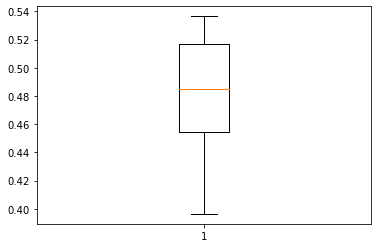

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [614]:
scoring = "recall"
kfold = StratifiedKFold(
    n_splits=10, shuffle=True, random_state=1
)  # Setting number of splits equal to 5
cv_result_bfr = cross_val_score(
    estimator=lr, X=X_train, y=y_train, scoring=scoring, cv=kfold
)
# Plotting boxplots for CV scores of model defined above
plt.boxplot(cv_result_bfr)
plt.show()

* Performance on training set varies between 0.49 to 0.54 recall.
* Let's check the performance on validation data.

In [615]:
# Calculating different metrics on train set
log_reg_model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision       F1  Minimum_Vs_Model_cost
0  0.967333  0.485976   0.853319  0.61927                0.53063

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [616]:
# Calculating different metrics on validation set
log_reg_model_val_perf = model_performance_classification_sklearn(lr, X_val, y_val)
print("Validation performance:")
log_reg_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9661  0.462523   0.848993  0.598817               0.519962

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

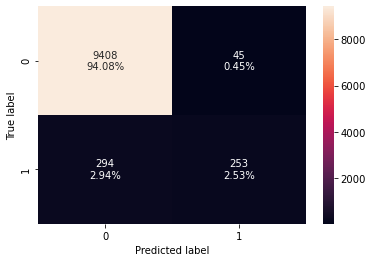

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [617]:
# creating confusion matrix
confusion_matrix_sklearn(lr, X_val, y_val)

* Observations
* From the above matrix we can see that the FP is 45.This less compared to the FN which is 294. 
* As the data is imbalanced,the FN is more. We should try and remediate FN that during the testing with over & undersample stages which should improve the model performance
* On the aspects of comparision between train and validation datasets,the model is generalizing well as the difference in the metric of interest recall and Minimum_Vs_Model_cost is low.
* Recall in training is 0.48 whereas in validation,it is 0.46
* Minimum_Vs_Model_cost is 0.53 in training whereas in validation it is 0.51

### Decision Tree

In [618]:
# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [619]:
model = DecisionTreeClassifier(
    criterion="gini", class_weight="balanced", random_state=1
)
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [620]:
# Check the performance on training dataset
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
print(decision_tree_perf_train)

   Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [621]:
# Check the performance on validation dataset
decision_tree_perf_val = model_performance_classification_sklearn(model, X_val, y_val)
decision_tree_perf_val

Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9717  0.720293   0.751908  0.735761               0.647082

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* As seen from the above metric outputs,it is clear that the model is not generalizing well
* The recall in validation is 0.72 whereas the recall is 1.0 in training
* The Minimum_Vs_Model_cost is 0.64 in validation whereas it is 1.0 in the training
* As we perform oversampling & undersampling,the model will give a better performance

### Bagging Classifier

In [622]:
# Fit the bagging estimator model
bagging_estimator = BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train, y_train)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [623]:
# Check the metrics for the bagging estimator on the training dataset
bagging_classifier_perf_train = model_performance_classification_sklearn(
    bagging_estimator, X_train, y_train
)
print(bagging_classifier_perf_train)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.996867  0.943293   0.999354  0.970514               0.913479


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [624]:
# Check the metrics for the bagging estimator on the validation dataset
bagging_classifier_perf_val = model_performance_classification_sklearn(
    bagging_estimator, X_val, y_val
)
print(bagging_classifier_perf_val)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9839  0.736746   0.959524  0.833506               0.690076


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

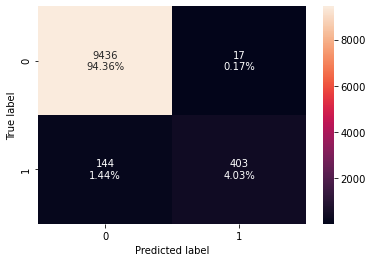

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [625]:
# Check the confusion matrix for bagging estimator
confusion_matrix_sklearn(bagging_estimator, X_val, y_val)

* The bagging classifier model is not generalizing well on the train and validation datasets
* The recall is 0.73 in validation whereas in training it is 0.94
* The Minimum_Vs_Model_cost is 0.69 in validation whereas in training it is 0.91
* based off the confusion matrix,the FP are low (only 17) whereas the FN are high (144). We need to improve the model performance by subjecting it to the oversamples and undersampled data populations and check the results

### Random Forest Classifier

In [626]:
# Train the random forest classifier
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [627]:
# Check the metrics for the random forest classifier on the training dataset
rf_perf_train = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
print(rf_perf_train)

   Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [628]:
# Check the metrics for the random forest classifier on the validation dataset
rf_perf_val = model_performance_classification_sklearn(rf_estimator, X_val, y_val)
print(rf_perf_val)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9869  0.767824   0.990566  0.865088               0.719737


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

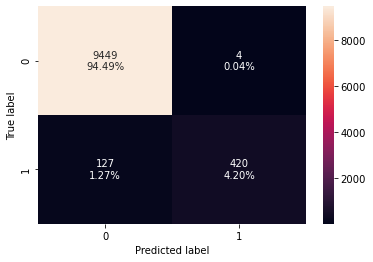

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [629]:
# Check the confusion matrix for random forest classifier
confusion_matrix_sklearn(rf_estimator, X_val, y_val)

* The random forest classifier is not generalizing well on the training and validation datasets.It is overfitting.
* The FN is 127 which is high. The FP is less which is 4
* The recall score on validation is 0.76 whereas in training the recall is 1.0
* The Minimum_Vs_Model_cost is 0.71 in validation whereas in training it is 1.0
* We need to improve the model performance by subjecting it to the oversamples and undersampled data populations and check the results

### Boosting

### AdaBoost Classifier

In [630]:
abc = AdaBoostClassifier(random_state=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [631]:
# Check the AdaBoost classifier metrics on training dataset
abc_perf_train = model_performance_classification_sklearn(abc, X_train, y_train)
print(abc_perf_train)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.975867  0.637195   0.890119  0.742715               0.613161


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [632]:
# Check the AdaBoost classifier metrics on validation dataset
abc_perf_val = model_performance_classification_sklearn(abc, X_val, y_val)
print(abc_perf_val)

   Accuracy   Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9729  0.61426   0.848485  0.712619               0.595428


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

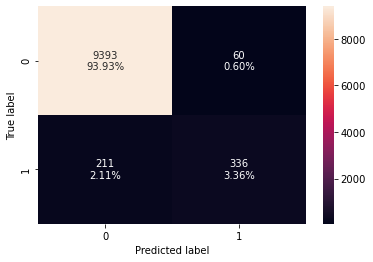

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [633]:
# Check the confusion matrix for AdaBoost Classifier
confusion_matrix_sklearn(abc, X_val, y_val)

* The model is generalizing well on the training and validation datasets
* Recall is 0.61 in validation whereas it is 0.63 in training dataset
* The Minimum_Vs_Model_cost is 0.59 in validation whereas it is 0.61 in the training dataset
* The FN and FP are both high based off the confusion matrix.
* We need to improve the model performance by subjecting it to the oversamples and undersampled data populations and check the results

### Gradient Boosting Classifier

In [634]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [635]:
# Check the GB metrics for training dataset
gbc_perf_train = model_performance_classification_sklearn(gbc, X_train, y_train)
print(gbc_perf_train)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.987133  0.779878   0.980828  0.868886               0.728889


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [636]:
# Check the GB metrics for validation dataset
gbc_perf_val = model_performance_classification_sklearn(gbc, X_val, y_val)
print(gbc_perf_val)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9829  0.720293   0.956311  0.821689                0.67698


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

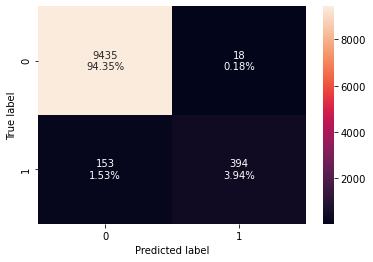

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [637]:
# Check the confusion matrix for GB
confusion_matrix_sklearn(gbc, X_val, y_val)

* The GB model is not generalizing well. There are variation in the recall and Minimum_Vs_Model_cost metrics 
* on the train and validation datasets
* Based off the confusion matrix,the FN is 153,which is high.
* We need to improve the model performance by subjecting it to the oversamples and undersampled data populations 
* and check the results

### XGBoost Classifier

In [638]:
xgb = XGBClassifier(random_state=1, eval_metric="logloss")
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [639]:
# Check the performance on the training dataset
xgb_perf_train = model_performance_classification_sklearn(xgb, X_train, y_train)
print(xgb_perf_train)

   Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [640]:
# Check the performance on the validation dataset
xgb_perf_val = model_performance_classification_sklearn(xgb, X_val, y_val)
print(xgb_perf_val)

   Accuracy   Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9902  0.83181   0.986985  0.902778               0.778832


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

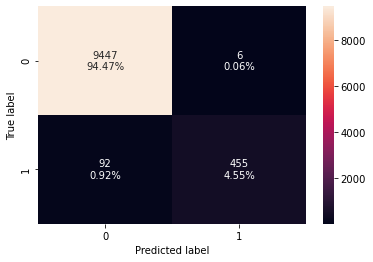

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [641]:
# Check the confusion matrix for XGB
confusion_matrix_sklearn(xgb, X_val, y_val)

* The XGB model is not generalizing well on the train and validation datasets
* The recall is 0.83 in validation whereas it is 1.0 in the training
* The Minimum_Vs_Model_cost is 0.77 in the validation dataset whereas it is 1.0 in the training dataset
* Based off the confusion matrix,the FP is really low in XGB with just 6. The FN is 92 which is low compared to all other boosting models
* We need to improve the model performance by subjecting it to the oversamples and undersampled data populations 
* and check the results

## Model Building with Oversampled data

In [642]:
# Synthetic Minority Over Sampling Technique
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)

X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 1640
Before UpSampling, counts of label 'No': 28360 

After UpSampling, counts of label 'Yes': 28360
After UpSampling, counts of label 'No': 28360 

After UpSampling, the shape of train_X: (56720, 40)
After UpSampling, the shape of train_y: (56720,) 



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Logistic Regression - Oversampled

In [643]:
### Logistic Regression with oversampled data
lr_over = LogisticRegression(random_state=1)
lr_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [644]:
# Calculating different metrics on train set
log_reg_model_train_perf_over = model_performance_classification_sklearn(
    lr_over, X_train_over, y_train_over
)
print("Training performance:")
log_reg_model_train_perf_over

Training performance:


Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.874418  0.875529   0.873588  0.874558               0.800203

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [645]:
# Calculating different metrics on validation set
log_reg_model_val_perf_over = model_performance_classification_sklearn(
    lr_over, X_val, y_val
)
print("Validation performance:")
log_reg_model_val_perf_over

Validation performance:


Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0     0.873  0.839122   0.279707  0.419561               0.502911

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

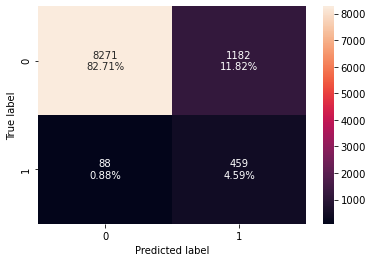

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [646]:
# creating confusion matrix
confusion_matrix_sklearn(lr_over, X_val, y_val)

* The logistic regression model is not generalizing well on the oversampled trained and validation dataset
* The recall and Minimum_Vs_Model_cost metric from the oversampled trained and validation dataset have huge difference. The model is not performing well.We need to try undersampling and check for model performance  

### Decision Tree - Oversampled

In [647]:
#fit the oversampled data
model = DecisionTreeClassifier(
    criterion="gini", class_weight="balanced", random_state=1
)
model.fit(X_train_over, y_train_over)


DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [648]:
# Check the performance on training dataset
decision_tree_perf_train_over = model_performance_classification_sklearn(
    model, X_train_over, y_train_over
)
decision_tree_perf_train_over

Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [649]:
# Check the performance on validation dataset
decision_tree_perf_val_over = model_performance_classification_sklearn(
    model, X_val, y_val
)
decision_tree_perf_val_over

Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9511  0.813528   0.534856  0.645395               0.646572

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The model is not generalizing well on the oversampled train and validation dataset for decision trees
* Recall and Minimum_Vs_Model_cost metrics have differences btw the train and validation dataset for decision trees. The model is overfitting.
* We need to try undersampling and check for model performance  

### Bagging Classifier - Oversampled

In [650]:
# Fit the bagging estimator model
bagging_estimator_over = BaggingClassifier(random_state=1)
bagging_estimator_over.fit(X_train_over, y_train_over)

BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [651]:
# Check the metrics for the bagging estimator on the training dataset
bagging_classifier_perf_train_over = model_performance_classification_sklearn(
    bagging_estimator_over, X_train_over, y_train_over
)
print(bagging_classifier_perf_train_over)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.998907  0.998237   0.999576  0.998906                0.99693


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [652]:
# Check the metrics for the bagging estimator on the validation dataset
bagging_classifier_perf_val_over = model_performance_classification_sklearn(
    bagging_estimator_over, X_val, y_val
)
print(bagging_classifier_perf_val_over)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9839  0.837294   0.864151  0.850511               0.760426


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

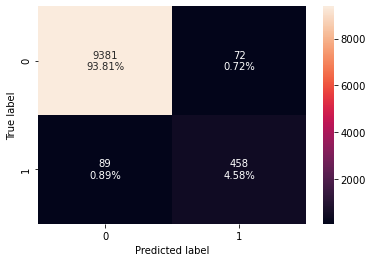

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [653]:
# Check the confusion matrix for bagging estimator
confusion_matrix_sklearn(bagging_estimator_over, X_val, y_val)


* The bagging classifier with the oversampled data is not generalizing on the train and validation datasets
* The recall and Minimum_Vs_Model_cost btw the train and validation dataset have difference. It is performing well on the training dataset but not on the validation dataset. The model is overfitting.
* We need to try undersampling and check for model performance 

### Random Forest Classifier

In [654]:
# Train the random forest classifier
rf_estimator_over = RandomForestClassifier(random_state=1)
rf_estimator_over.fit(X_train_over, y_train_over)

RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [655]:
# Check the metrics for the random forest classifier on the training dataset
rf_perf_train_over = model_performance_classification_sklearn(
    rf_estimator_over, X_train_over, y_train_over
)
print(rf_perf_train_over)

   Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [656]:
# Check the metrics for the random forest classifier on the validation dataset
rf_perf_val_over = model_performance_classification_sklearn(
    rf_estimator_over, X_val, y_val
)
print(rf_perf_val_over)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9908  0.862888   0.965235  0.911197               0.807182


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

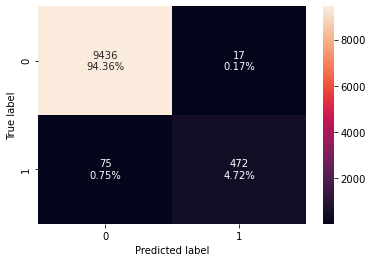

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [657]:
# Check the confusion matrix for random forest classifier
confusion_matrix_sklearn(rf_estimator_over, X_val, y_val)


* The model is overfitting with the oversampled data. The recall and Minimum_Vs_Model_cost have difference btw the training and validation datasets. The FN is lowered down to 75 in this oversampled data.
* We need to try undersampling and check for model performance

### Boosting

### AdaBoost Classifier

In [658]:
abc_over = AdaBoostClassifier(random_state=1)
abc_over.fit(X_train_over, y_train_over)

AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [659]:
# Check the AdaBoost classifier metrics on training dataset
abc_perf_train_over = model_performance_classification_sklearn(
    abc_over, X_train_over, y_train_over
)
print(abc_perf_train_over)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.904672  0.893794   0.913672  0.903624               0.829765


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [660]:
# Check the AdaBoost classifier metrics on validation dataset
abc_perf_val_over = model_performance_classification_sklearn(abc_over, X_val, y_val)
print(abc_perf_val_over)

   Accuracy    Recall  Precision     F1  Minimum_Vs_Model_cost
0    0.9055  0.850091   0.350151  0.496               0.563143


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

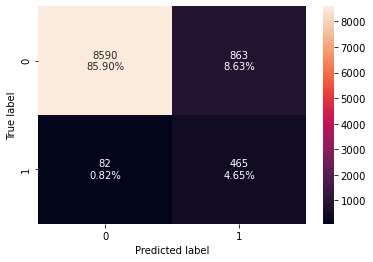

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [661]:
# Check the confusion matrix for ABC
confusion_matrix_sklearn(abc_over, X_val, y_val)

* The ABC model is overfitting with oversampled data
* Recall is slightly closer btw the training and validation dataset.However there is huge difference in the Minimum_Vs_Model_cost.
* The model is not generalizing well. The FN is higher in this model.
* We need to try undersampling and check for model performance

### Gradient Boosting Classifier

In [662]:
gbc_over = GradientBoostingClassifier(random_state=1)
gbc_over.fit(X_train_over, y_train_over)

GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [663]:
# Check the GB metrics for training dataset
gbc_perf_train_over = model_performance_classification_sklearn(
    gbc_over, X_train_over, y_train_over
)
print(gbc_perf_train_over)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.944164  0.915867   0.970809  0.942538               0.870019


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [664]:
# Check the GB metrics for validation dataset
gbc_perf_val_over = model_performance_classification_sklearn(gbc_over, X_val, y_val)
print(gbc_perf_val_over)

   Accuracy   Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9657  0.88117   0.634211  0.737567               0.731283


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

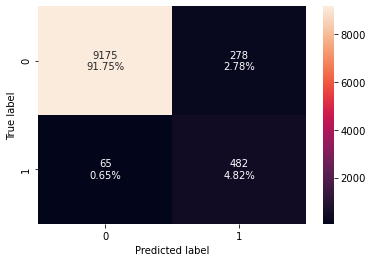

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [665]:
# Check the confusion matrix for GB
confusion_matrix_sklearn(gbc_over, X_val, y_val)


* The GB model is overfitting with the oversampled data.
* The Minimum_Vs_Model_cost is having huge difference between the training and validation datasets
* The recall is slightly closer between the training and validation datasets
* We need to try undersampling and check for model performance

### XGBoost Classifier

In [666]:
xgb_over = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_over.fit(X_train_over, y_train_over)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [667]:
# Check the performance on the training dataset
xgb_perf_train_over = model_performance_classification_sklearn(
    xgb_over, X_train_over, y_train_over
)
print(xgb_perf_train_over)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.998713  0.998061   0.999364  0.998712               0.996568


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [668]:
# Check the performance on the validation dataset
xgb_perf_val_over = model_performance_classification_sklearn(xgb_over, X_val, y_val)
print(xgb_perf_val_over)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9882  0.879342   0.902439  0.890741               0.811172


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

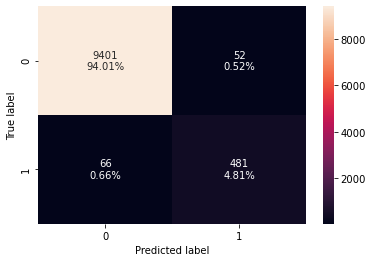

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [669]:
# Check the confusion matrix for XGB
confusion_matrix_sklearn(xgb_over, X_val, y_val)


* The XGB model is overfitting with the training and validation datasets
* The Minimum_Vs_Model_cost has differences btw the training and validation datasets
* The model is not generalizing well. The FN is lowered to 66 but the FP is at 52.
* We need to try undersampling and check for model performance

## Model Building with Undersampled data

In [670]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Logistic Regression - Undersampled

In [671]:
### Logistic Regression with undersampled data
lr_un = LogisticRegression(random_state=1)
lr_un.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [672]:
# Calculating different metrics on train set
log_reg_model_train_perf_un = model_performance_classification_sklearn(
    lr_un, X_train_un, y_train_un
)
print("Training performance:")
log_reg_model_train_perf_un


Training performance:


Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.859451  0.855488   0.862323  0.858892               0.777374

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [673]:
# Calculating different metrics on validation set
log_reg_model_val_perf_un = model_performance_classification_sklearn(
    lr_un, X_val, y_val
)
print("Validation performance:")
log_reg_model_val_perf_un


Validation performance:


Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.8639  0.846435   0.266092  0.404897               0.491612

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

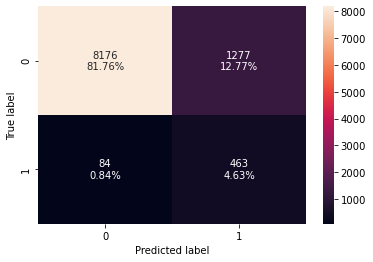

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [674]:
# creating confusion matrix
confusion_matrix_sklearn(lr_un, X_val, y_val)



* The Logistic regression model with the undersampled data is overfitting
* The recall metric is closer btw the training and validation dataset.However the Minimum_Vs_Model_cost has difference btw the 
* training and validation datasets
* The FN is lowered but the FP is high from the confusion matrix
* We have perform hyper parameter tuning to improve the performance of the model

In [675]:
### Decision Tree - Undersampled

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [676]:
#fit the Undersampled data
model = DecisionTreeClassifier(
    criterion="gini", class_weight="balanced", random_state=1
)
model.fit(X_train_un, y_train_un)


DecisionTreeClassifier(class_weight='balanced', random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [677]:
# Check the performance on training dataset
decision_tree_perf_train_un = model_performance_classification_sklearn(
    model, X_train_un, y_train_un
)
decision_tree_perf_train_un

Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [678]:
# Check the performance on validation dataset
decision_tree_perf_val_un = model_performance_classification_sklearn(
    model, X_val, y_val
)
decision_tree_perf_val_un

Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.8664  0.853748   0.271039  0.411454               0.497725

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The decision tree model is overfitting
* The Minimum_Vs_Model_cost has difference btw the training and validation datasets
* We have perform hyper parameter tuning to improve the performance of the model

### Bagging Classifier

In [679]:
#Fit the bagging estimator model
bagging_estimator_un = BaggingClassifier(random_state=1)
bagging_estimator_un.fit(X_train_un, y_train_un)


BaggingClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [680]:
# Check the metrics for the bagging estimator on the training dataset
bagging_classifier_perf_train_un = model_performance_classification_sklearn(
    bagging_estimator_un, X_train_un, y_train_un
)
print(bagging_classifier_perf_train_un)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.989024  0.979878   0.998137  0.988923               0.966981


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [681]:
# Check the metrics for the bagging estimator on the validation dataset
bagging_classifier_perf_val_un = model_performance_classification_sklearn(
    bagging_estimator_un, X_val, y_val
)
print(bagging_classifier_perf_val_un)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9505  0.862888   0.529148  0.656011               0.673645


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

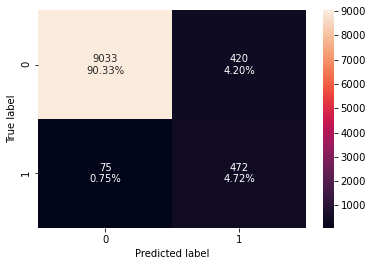

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [682]:
# Check the confusion matrix for bagging estimator
confusion_matrix_sklearn(bagging_estimator_un, X_val, y_val)


* The Bagging Classifier model with the undersampled data is overfitting
* The difference btw the Minimum_Vs_Model_cost of the training and validation datasets is huge.
* We have perform hyper parameter tuning to improve the performance of the model

### Random Forest Classifier

In [683]:
# Train the random forest classifier
rf_estimator_un = RandomForestClassifier(random_state=1)
rf_estimator_un.fit(X_train_un, y_train_un)


RandomForestClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [684]:
# Check the metrics for the random forest classifier on the training dataset
rf_perf_train_un = model_performance_classification_sklearn(
    rf_estimator_un, X_train_un, y_train_un
)
print(rf_perf_train_un)

   Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [685]:
# Check the metrics for the random forest classifier on the validation dataset
rf_perf_val_un = model_performance_classification_sklearn(rf_estimator_un, X_val, y_val)
print(rf_perf_val_un)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9662  0.884826   0.637681  0.741194               0.735545


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

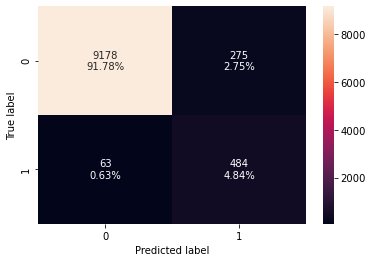

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [686]:
# Check the confusion matrix for random forest classifier
confusion_matrix_sklearn(rf_estimator_un, X_val, y_val)


* The Random Forest Classifier is overfitting on the undersampled data
* The Minimum_Vs_Model_cost btw the training and validation set have huge differences
* The FN is lowered to 63 but the FP is quite high based off the confusion matrix
* We have perform hyper parameter tuning to improve the performance of the model

### Boosting

### AdaBoost Classifier

In [687]:
abc_un = AdaBoostClassifier(random_state=1)
abc_un.fit(X_train_un, y_train_un)


AdaBoostClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [688]:
# Check the AdaBoost classifier metrics on training dataset
abc_perf_train_un = model_performance_classification_sklearn(
    abc_un, X_train_un, y_train_un
)
print(abc_perf_train_un)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.906098  0.893902    0.91625  0.904938                0.83052


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [689]:
# Check the AdaBoost classifier metrics on validation dataset
abc_perf_val_un = model_performance_classification_sklearn(abc_un, X_val, y_val)
print(abc_perf_val_un)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.8797  0.864717   0.295256  0.440205               0.522611


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

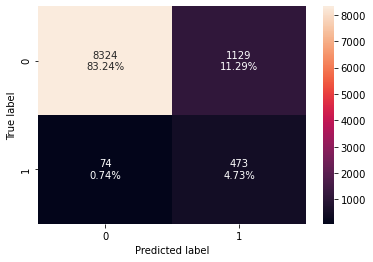

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [690]:
# Check the confusion matrix for ABC
confusion_matrix_sklearn(abc_un, X_val, y_val)


* The ABC model is overfitting with the undersampled data
* The difference of Minimum_Vs_Model_cost btw the training and validation dataset is huge
* The recall metric score is slightly closer btw the training and validation dataset
* The FN is lowered to 75 but the FP is high to 1129
* We have perform hyper parameter tuning to improve the performance of the model

### Gradient Boosting Classifier

In [691]:
gbc_un = GradientBoostingClassifier(random_state=1)
gbc_un.fit(X_train_un, y_train_un)


GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [692]:
# Check the GB metrics for training dataset
gbc_perf_train_un = model_performance_classification_sklearn(
    gbc_un, X_train_un, y_train_un
)
print(gbc_perf_train_un)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.952134  0.918293   0.984957  0.950458               0.876537


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [693]:
# Check the GB metrics for validation dataset
gbc_perf_val_un = model_performance_classification_sklearn(gbc_un, X_val, y_val)
print(gbc_perf_val_un)

   Accuracy    Recall  Precision       F1  Minimum_Vs_Model_cost
0    0.9513  0.888483   0.532895  0.66621               0.691821


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

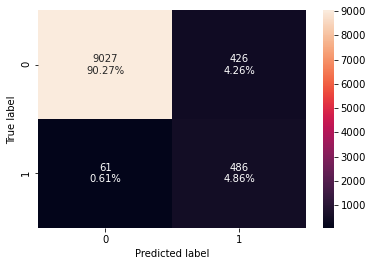

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [694]:
# Check the confusion matrix for GB
confusion_matrix_sklearn(gbc_un, X_val, y_val)


* The GB model is overfitting with the undersampled data
* The difference of Minimum_Vs_Model_cost metric btw the training and validation datasets is huge
* The FN is lowered to 61 but the FP is high at 426
* We have perform hyper parameter tuning to improve the performance of the model

### XGBoost Classifier

In [695]:
xgb_un = XGBClassifier(random_state=1, eval_metric="logloss")
xgb_un.fit(X_train_un, y_train_un)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [696]:
# Check the performance on the training dataset
xgb_perf_train_un = model_performance_classification_sklearn(
    xgb_un, X_train_un, y_train_un
)
print(xgb_perf_train_un)

   Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [697]:
# Check the performance on the validation dataset
xgb_perf_val_un = model_performance_classification_sklearn(xgb_un, X_val, y_val)
print(xgb_perf_val_un)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9687  0.897623   0.656417  0.758301               0.753444


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

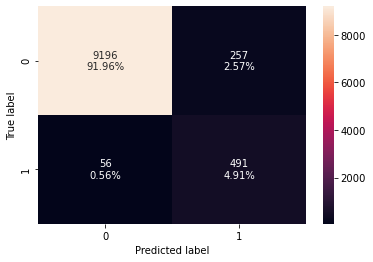

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [698]:
# Check the confusion matrix for XGB
confusion_matrix_sklearn(xgb_un, X_val, y_val)



* The model is overfitting with the undersampled data
* The Minimum_Vs_Model_cost metric difference btw training and validation dataset is still huge
* The FN is lowered to 56. The FP is high at 257.
* We have perform hyper parameter tuning to improve the performance of the model

## Model Selection

* As we have built model using the default,oversampled and undersampled data,we can now do a comparision to understand which 
* model is giving us the highest value for Minimum_Vs_Model_cost so that the maintenance cost is lowest.
* From each model we will pick up the Minimum_Vs_Model_cost
* There are 7 models which we have built. So the comparision will be based off those models

In [699]:
# Comparing the metric in the default dataset
models_comp_df = pd.concat(
    [
        log_reg_model_train_perf.Minimum_Vs_Model_cost,
        log_reg_model_val_perf.Minimum_Vs_Model_cost,
        decision_tree_perf_train.Minimum_Vs_Model_cost,
        decision_tree_perf_val.Minimum_Vs_Model_cost,
        bagging_classifier_perf_train.Minimum_Vs_Model_cost,
        bagging_classifier_perf_val.Minimum_Vs_Model_cost,
        rf_perf_train.Minimum_Vs_Model_cost,
        rf_perf_val.Minimum_Vs_Model_cost,
        abc_perf_train.Minimum_Vs_Model_cost,
        abc_perf_val.Minimum_Vs_Model_cost,
        gbc_perf_train.Minimum_Vs_Model_cost,
        gbc_perf_val.Minimum_Vs_Model_cost,
        xgb_perf_train.Minimum_Vs_Model_cost,
        xgb_perf_val.Minimum_Vs_Model_cost,
    ],
    axis=1,
)
models_comp_df.columns = [
    "LG Train",
    "LG Validation",
    "DT Train ",
    "DT Validation ",
    "BG Train ",
    "BG Validation ",
    "Random Forest Train",
    "Random Forest Validation",
    "AdaBoost - Train",
    "AdaBoost - Validation",
    "GBoost - Train",
    "GBoost - Validation",
    "XG Boost - Train",
    "XG Boost - Validation",
]
print("Comparison of all models for default dataset:")
models_comp_df

Comparison of all models for default dataset:


LG Train  LG Validation  DT Train   DT Validation   BG Train   \
0   0.53063       0.519962        1.0        0.647082   0.913479   

   BG Validation   Random Forest Train  Random Forest Validation  \
0        0.690076                  1.0                  0.719737   

   AdaBoost - Train  AdaBoost - Validation  GBoost - Train  \
0          0.613161               0.595428        0.728889   

   GBoost - Validation  XG Boost - Train  XG Boost - Validation  
0              0.67698               1.0               0.778832

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [700]:
# Comparing the metric in the oversampling dataset
models_comp_over = pd.concat(
    [
        log_reg_model_train_perf_over.Minimum_Vs_Model_cost,
        log_reg_model_val_perf_over.Minimum_Vs_Model_cost,
        decision_tree_perf_train_over.Minimum_Vs_Model_cost,
        decision_tree_perf_val_over.Minimum_Vs_Model_cost,
        bagging_classifier_perf_train_over.Minimum_Vs_Model_cost,
        bagging_classifier_perf_val_over.Minimum_Vs_Model_cost,
        rf_perf_train_over.Minimum_Vs_Model_cost,
        rf_perf_val_over.Minimum_Vs_Model_cost,
        abc_perf_train_over.Minimum_Vs_Model_cost,
        abc_perf_val_over.Minimum_Vs_Model_cost,
        gbc_perf_train_over.Minimum_Vs_Model_cost,
        gbc_perf_val_over.Minimum_Vs_Model_cost,
        xgb_perf_train_over.Minimum_Vs_Model_cost,
        xgb_perf_val_over.Minimum_Vs_Model_cost,
    ],
    axis=1,
)
models_comp_over.columns = [
    "LG Train",
    "LG Validation",
    "DT Train ",
    "DT Validation ",
    "BG Train ",
    "BG Validation ",
    "Random Forest Train",
    "Random Forest Validation",
    "AdaBoost - Train",
    "AdaBoost - Validation",
    "GBoost - Train",
    "GBoost - Validation",
    "XG Boost - Train",
    "XG Boost - Validation",
]
print("Comparison of all models for oversampled dataset:")
models_comp_over

Comparison of all models for oversampled dataset:


LG Train  LG Validation  DT Train   DT Validation   BG Train   \
0  0.800203       0.502911        1.0        0.646572    0.99693   

   BG Validation   Random Forest Train  Random Forest Validation  \
0        0.760426                  1.0                  0.807182   

   AdaBoost - Train  AdaBoost - Validation  GBoost - Train  \
0          0.829765               0.563143        0.870019   

   GBoost - Validation  XG Boost - Train  XG Boost - Validation  
0             0.731283          0.996568               0.811172

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [701]:
# Comparing the metric in the undersampling dataset
models_comp_un = pd.concat(
    [
        log_reg_model_train_perf_un.Minimum_Vs_Model_cost,
        log_reg_model_val_perf_un.Minimum_Vs_Model_cost,
        decision_tree_perf_train_un.Minimum_Vs_Model_cost,
        decision_tree_perf_val_un.Minimum_Vs_Model_cost,
        bagging_classifier_perf_train_un.Minimum_Vs_Model_cost,
        bagging_classifier_perf_val_un.Minimum_Vs_Model_cost,
        rf_perf_train_un.Minimum_Vs_Model_cost,
        rf_perf_val_un.Minimum_Vs_Model_cost,
        abc_perf_train_un.Minimum_Vs_Model_cost,
        abc_perf_val_un.Minimum_Vs_Model_cost,
        gbc_perf_train_un.Minimum_Vs_Model_cost,
        gbc_perf_val_un.Minimum_Vs_Model_cost,
        xgb_perf_train_un.Minimum_Vs_Model_cost,
        xgb_perf_val_un.Minimum_Vs_Model_cost,
    ],
    axis=1,
)
models_comp_un.columns = [
    "LG Train",
    "LG Validation",
    "DT Train ",
    "DT Validation ",
    "BG Train ",
    "BG Validation ",
    "Random Forest Train",
    "Random Forest Validation",
    "AdaBoost - Train",
    "AdaBoost - Validation",
    "GBoost - Train",
    "GBoost - Validation",
    "XG Boost - Train",
    "XG Boost - Validation",
]
print("Comparison of all models for undersampled dataset:")
models_comp_un

Comparison of all models for undersampled dataset:


LG Train  LG Validation  DT Train   DT Validation   BG Train   \
0  0.777374       0.491612        1.0        0.497725   0.966981   

   BG Validation   Random Forest Train  Random Forest Validation  \
0        0.673645                  1.0                  0.735545   

   AdaBoost - Train  AdaBoost - Validation  GBoost - Train  \
0           0.83052               0.522611        0.876537   

   GBoost - Validation  XG Boost - Train  XG Boost - Validation  
0             0.691821               1.0               0.753444

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [703]:
# Combine all the models along with their data sampling methods
frames = [models_comp_df, models_comp_over, models_comp_un]
combined = pd.concat(frames)
print(combined)
# Write the models & sampling methods to a csv file
# combined.to_csv("out.csv")

   LG Train  LG Validation  DT Train   DT Validation   BG Train   \
0  0.530630       0.519962        1.0        0.647082   0.913479   
0  0.800203       0.502911        1.0        0.646572   0.996930   
0  0.777374       0.491612        1.0        0.497725   0.966981   

   BG Validation   Random Forest Train  Random Forest Validation  \
0        0.690076                  1.0                  0.719737   
0        0.760426                  1.0                  0.807182   
0        0.673645                  1.0                  0.735545   

   AdaBoost - Train  AdaBoost - Validation  GBoost - Train  \
0          0.613161               0.595428        0.728889   
0          0.829765               0.563143        0.870019   
0          0.830520               0.522611        0.876537   

   GBoost - Validation  XG Boost - Train  XG Boost - Validation  
0             0.676980          1.000000               0.778832  
0             0.731283          0.996568               0.811172  
0      

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Comparing all the models and data sampling methods,I have arrived at the below conclusions

* The XG Boost model with the oversampled data has a score of 0.81 for the target metric on the validation dataset. The train dataset target metric score is 0.99. There is a good chance to tune the hyper parameters and arrive at better performing model using this model. This is the first model I am picking up to improve the performance.

* The random forest model with the oversampled data has a score of 0.80 for the target metric on the validation dataset. The training is at 1.0 for this metric. As we need to maximize the target metric value,I am choosing this as my second model for improving the performance.

* The GB model with the oversampled data has a score of 0.73 for the target metric on the validation dataset. The train dataset target metric score is 0.87. As we need to maximize the target metric value, I am choosing this as my third model for improving the performance.


## HyperparameterTuning 

- **Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

#### For XGBoost:
param_grid={'n_estimators':np.arange(150,300,50),'scale_pos_weight':[5,10],
            'learning_rate':[0.1,0.2], 'gamma':[0,3,5],
            'subsample':[0.8,0.9]}

#### For Gradient Boosting:
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(75,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]}


#### For Adaboost:
param_grid = {
    "n_estimators": np.arange(10, 110, 20),
    "learning_rate": [ 0.2, 0.05, 1],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=1, random_state=1),
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1)]}

#### For logistic Regression:
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#### For Bagging Classifier:
param_grid = {
              'max_samples': [0.8,0.9], 
              'max_features': [0.8,0.9],
              'n_estimators' : [40,50]}

#### For Random Forest:
param_grid = {
    "n_estimators": [150,250],
    "min_samples_leaf": np.arange(1, 3),
    "max_features": ['sqrt','log2'],
    "max_samples": np.arange(0.2, 0.6, 0.1)}

#### For Decision Trees:
param_grid = {'max_depth': np.arange(2,20), 
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001]
             }

### XGB - Hyperparameter tuning

In [704]:
%%time

# Choose the type of classifier.
# In addition to the parameters recommended by Great Learning,I have used max_depth & min_child_weight to 
# improve the model performance
# The other parameter values as recommended by Great Learning are as-is below 
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")
param_grid = {
    "n_estimators": np.arange(150, 300, 50),
    "scale_pos_weight": [5, 10],
    "learning_rate": [0.1, 0.2],
    "gamma": [0, 3, 5],
    "subsample": [0.8, 0.9],
    "max_depth": np.arange(7, 11, 2), # added parameter
    "min_child_weight": np.arange(8, 9, 1), # added parameter
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(xgb_tuned, param_grid, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train_over, y_train_over)

Wall time: 27min 40s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=5, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=7, min_child_weight=8, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=10, subsample=0.9, tree_method='exact',
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [705]:
# Check the performance on the training dataset
xgb_perf_tuned_train_over = model_performance_classification_sklearn(
    xgb_tuned, X_train_over, y_train_over
)
print(xgb_perf_tuned_train_over)


   Accuracy  Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.994411     1.0   0.988946  0.994442               0.996288


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [706]:
# Check the performance on the validation dataset
xgb_perf_tuned_val_over = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)
print(xgb_perf_tuned_val_over)



   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9741  0.903108   0.705714  0.792302               0.776989


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

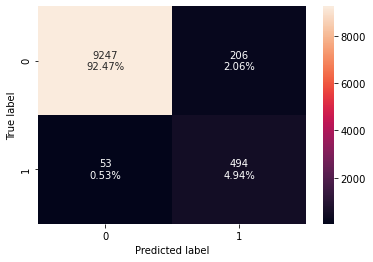

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [707]:
# Check the confusion matrix for XGB
confusion_matrix_sklearn(xgb_tuned, X_val, y_val)


* The Minimum_Vs_Model_cost metric on the tuned model is 0.80. We will check the performance of the model on the test data

In [708]:
# Drop the target variable in the predictor variables and in the target variable drop all the predictor variables
# Please note that this is for the test dataset
X_test = renew_test.drop(["Target"], axis=1)
y_test = renew_test["Target"]


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [709]:
# Check the performance on the test dataset
# The expectation of the tuned model on the test dataset is to exceed 0.78 for the Minimum_Vs_Model_cost metric
xgb_perf_tuned_test_over = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print(xgb_perf_tuned_test_over)

   Accuracy    Recall  Precision       F1  Minimum_Vs_Model_cost
0    0.9713  0.882998   0.684136  0.77095               0.751374


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The XGB model is not meeting the expected value of 0.78 for the test data. We have to check the other models and compare
* The model is returning the metric score of 0.77 in test set and 0.80 in the validation set.
* The model is returning the metric score of 0.99 in the train set
* Overall after tuning too, the model is overfitting.

### Random Forest - Model Tuning

In [710]:
# Choose the type of classifier.
rf_estimator_tuned = RandomForestClassifier(random_state=1, class_weight="balanced")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [711]:
%%time
# For Random Forest:
# No changes in the parameters. They are as recommended by Great Learning

param_grid = { "n_estimators": [150,250], "min_samples_leaf": np.arange(1, 3), "max_features": ['sqrt','log2'], "max_samples": np.arange(0.2, 0.6, 0.1)}
# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(rf_estimator_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train_over, y_train_over)


Wall time: 18min 25s


RandomForestClassifier(class_weight='balanced', max_features='sqrt',
                       max_samples=0.5000000000000001, n_estimators=250,
                       random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [712]:
# Check the performance on the training dataset
rf_estimator_perf_tuned_train_over = model_performance_classification_sklearn(
    rf_estimator_tuned, X_train_over, y_train_over
)
print(rf_estimator_perf_tuned_train_over)


   Accuracy   Recall  Precision        F1  Minimum_Vs_Model_cost
0  0.998819  0.99792   0.999717  0.998818               0.996451


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [713]:
# Check the performance on the validation dataset
rf_estimator_perf_tuned_val_over = model_performance_classification_sklearn(rf_estimator_tuned, X_val, y_val)
print(rf_estimator_perf_tuned_val_over)


   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9902  0.872029   0.944554  0.906844               0.812779


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

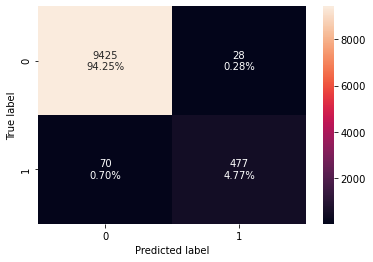

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [714]:
# Check the confusion matrix for Random Forest tuned model
confusion_matrix_sklearn(rf_estimator_tuned, X_val, y_val)


In [715]:
# Check the performance on the test dataset
# The expectation of the tuned model on the test dataset is to exceed 0.78 for the Minimum_Vs_Model_cost metric
rf_estimator_tuned_test_over = model_performance_classification_sklearn(
    rf_estimator_tuned, X_test, y_test
)
print(rf_estimator_tuned_test_over)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9896  0.859232   0.945674  0.900383               0.799318


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Using the tuned Random Forest classifier,we are getting a score of 0.79 for the Minimum_Vs_Model_cost
* This result meets the expectation of exceeding 0.78
* The model is still overfitting when we compare train and validation datasets on recall and Minimum_Vs_Model_cost score values.However atleast at this stage this model is performing well on the test and validation datasets from the metric score prespective.The test is scoring 0.79 whereas the validation is scoring 0.81.The difference of metric scores btw the test and validation is ~0.2,which is less and better for performance
* We will compare the value of this metric with other models to arrive at the final conclusion

### Gradient Boosting - Model Tuning

In [716]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1))
# GradientBoostingClassifier(random_state=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [717]:
%%time
#For Gradient Boosting:

param_grid = { "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)], 
"n_estimators": np.arange(75,150,25), 
"learning_rate": [0.2, 0.05, 1], 
"subsample":[0.5,0.7], 
"max_features":[0.5,0.7]}


# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(gbc_tuned, param_grid, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_over, y_train_over)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train_over, y_train_over)


Wall time: 29min


GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7,
                           n_estimators=125, subsample=0.7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [718]:
# Check the performance on the training dataset
gbc_perf_tuned_train_over = model_performance_classification_sklearn(
    gbc_tuned, X_train_over, y_train_over
)
print(gbc_perf_tuned_train_over)


   Accuracy  Recall  Precision   F1  Minimum_Vs_Model_cost
0       1.0     1.0        1.0  1.0                    1.0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [719]:
# Check the performance on the validation dataset
gbc_perf_tuned_val_over = model_performance_classification_sklearn(gbc_tuned, X_val, y_val)
print(gbc_perf_tuned_val_over)


   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9511  0.813528   0.534856  0.645395               0.646572


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

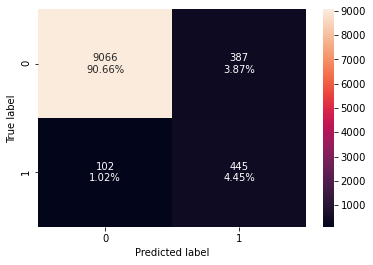

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [720]:
# Check the confusion matrix for GB tuned model
confusion_matrix_sklearn(gbc_tuned, X_val, y_val)


In [721]:
# Check the performance on the test dataset
# The expectation of the tuned model on the test dataset is to exceed 0.78 for the Minimum_Vs_Model_cost metric
gbc_tuned_test_over = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print(gbc_tuned_test_over)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9478  0.800731   0.514689  0.626609               0.631397


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* The model is overfitting as the tuning results are still not encouraging
* The Minimum_Vs_Model_cost on the validation and test is 0.64 and 0.63 which is the below the expectation to exceed 0.78
* We know at this point the Random Classifier with the oversampled data is the model that is giving the result of more than 0.78.

## Model Performance comparison and choosing the final model

In [722]:
# Combine all the models on their test results
frames = [xgb_perf_tuned_test_over, rf_estimator_tuned_test_over, gbc_tuned_test_over]
combined = pd.concat(frames)
print(combined)
# Write the models & sampling methods to a csv file
# combined.to_csv("out1.csv")

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9713  0.882998   0.684136  0.770950               0.751374
0    0.9896  0.859232   0.945674  0.900383               0.799318
0    0.9478  0.800731   0.514689  0.626609               0.631397


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Based off the results,we can see that the Minimum_Vs_Model_cost is 0.79 with the Random classifier model with the oversampled data.
* This is the final model we can choose for productionalizing

## Test set final performance

In [723]:
rf_estimator_tuned_test_over = model_performance_classification_sklearn(
    rf_estimator_tuned, X_test, y_test
)
print(rf_estimator_tuned_test_over)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9896  0.859232   0.945674  0.900383               0.799318


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

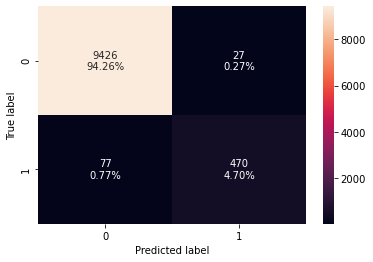

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [724]:
# Check the confusion matrix for Random Forest tuned model
confusion_matrix_sklearn(rf_estimator_tuned, X_test, y_test)


* As tested above,the Random classifier with the oversampled data gives us the best score for the Minimum_Vs_Model_cost
* The recall score is also maximised so that the FP and FN are reduced

#### Let us explore the feature importance based off this model

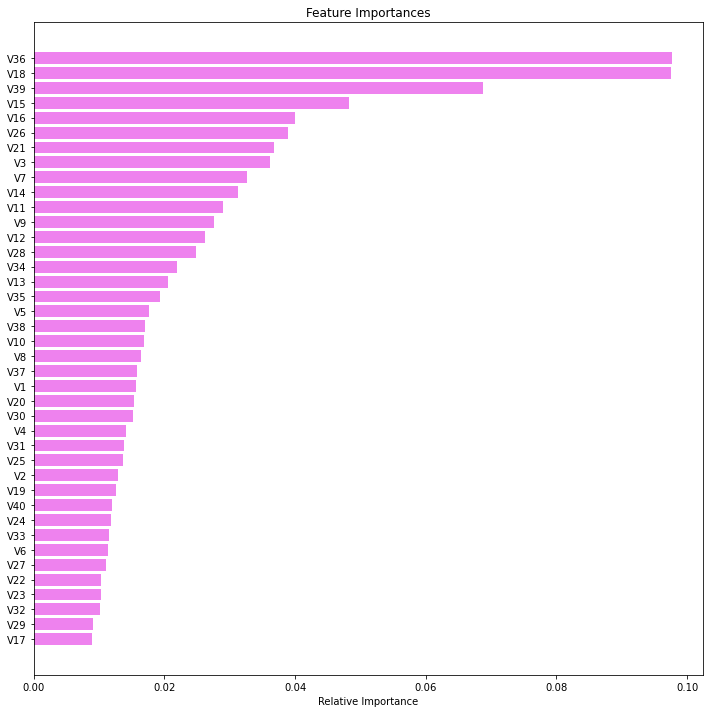

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [733]:
importances = rf_estimator_tuned.feature_importances_
indices = np.argsort(importances)
feature_names = list(X.columns)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Observations
* V36 and V18 are the top predictor variables having a importance of 0.10
* V39 is the next predictor variable having an importance of 0.07
* V15 and V16 are the next set of predictor variables 

## Pipelines to build the final model


In [725]:
# Pipelines for productionizing the model
# Now, we have a final model. let's use pipelines to put the model into production

# creating a list of numerical variables
numerical_features = [
    "V1",
    "V2",
]


# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
# Since the median and KNN imputers gave the same result,I am going with the simpleimputer for building the pipeline
# numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])
numeric_transformer = Pipeline(steps=[("imputer",KNNImputer(n_neighbors=5))])

# combining the numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
    ],
    remainder="passthrough",
)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [726]:
# Separating target variable and other variables
X = renew_test.drop(columns="Target")
y = renew_test["Target"]

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [727]:
# Creating new pipeline with best parameters
model = Pipeline(
    steps=[
        ("pre", preprocessor),
        (
            "RandomForestClassifier",
            RandomForestClassifier(
                class_weight="balanced",
                max_features="sqrt",
                max_samples=0.4000000000000001,
                n_estimators=250,
                random_state=1,
                min_samples_leaf=3,
            ),
        ),
    ]
)
# Fit the model on training data
model.fit(X, y)

Pipeline(steps=[('pre',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer())]),
                                                  ['V1', 'V2'])])),
                ('RandomForestClassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        max_features='sqrt',
                                        max_samples=0.4000000000000001,
                                        min_samples_leaf=3, n_estimators=250,
                                        random_state=1))])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [728]:
rf_estimator_tuned_test_pipeline = model_performance_classification_sklearn(model, X, y)
print(rf_estimator_tuned_test_pipeline)

   Accuracy    Recall  Precision        F1  Minimum_Vs_Model_cost
0    0.9911  0.844607   0.991416  0.912142               0.792754


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

* Based off the above pipeline,I have supplied the optimized parameters and checked for the model performance using the test dataset that is untreated
* The results for the metric Minimum_Vs_Model_cost matches to 0.79 which exceeds 0.78
* The pipeline can thus be productionalized

# Business Insights and Conclusions

* All the predictor variables are contributing towards predicting the target variable
* We have to oversample the dataset to build a generalized model
* We can achieve a maximum score of 0.79 for Minimum_Vs_Model_cost metric with this model in order to minimize the possible maintenance cost and the actual maintenance costs
* Based off this model the False positive(FP), which is failure detections in the generator of the wind turbine where actually there is no failure is lowered down to 0.003.This means that the maintenance cost will be low as the model will not predict the failure detections incorrectly.
* The False negatives(FN),which is real failures in the generator of wind turbine where there is no detection by the model is lowered to 0.14. This means the model has the ability to predict 0.86. In terms of the ratio,this means the model will predict the failures 86% of the times. It will fail to detect 14% of the failure instances.
* Overall the metrics are quite convincing to adapt the model